Assignment 2 : Classification Model Development <br>
To build a predictive model on a classification response variable which is isAlive<br>
(All coding in this assignment are come from all scripts in Python class and Machine learning class taught by Prof. Chase)

In [1]:
# importing libraries
import pandas            as pd                       # data science essentials
import matplotlib.pyplot as plt                      # data visualization
import seaborn           as sns                      # enhanced data viz
from sklearn.model_selection import train_test_split # train-test split
from sklearn.linear_model import LogisticRegression  # logistic regression
import statsmodels.formula.api as smf                # logistic regression
from sklearn.metrics import confusion_matrix         # confusion matrix
from sklearn.metrics import roc_auc_score            # auc score
from sklearn.neighbors import KNeighborsClassifier   # KNN for classification
from sklearn.neighbors import KNeighborsRegressor    # KNN for regression
from sklearn.preprocessing import StandardScaler     # standard scaler
from sklearn.tree import DecisionTreeClassifier      # classification trees
from sklearn.tree import plot_tree                   # tree plots


# loading data
file = "../../../GOT_character_predictions.xlsx"

got = pd.read_excel(io = file)

# setting pandas print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 100)


# displaying the head of the dataset
got.head(n = 5)

,S.No,name,title,culture,dateOfBirth,mother,father,heir,house,spouse,book1_A_Game_Of_Thrones,book2_A_Clash_Of_Kings,book3_A_Storm_Of_Swords,book4_A_Feast_For_Crows,book5_A_Dance_with_Dragons,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive
0,1,Viserys II Targaryen,NaN,NaN,NaN,Rhaenyra Targaryen,Daemon Targaryen,Aegon IV Targaryen,NaN,NaN,0,0,0,0,0,1.0,0.0,0.0,NaN,0,0,NaN,11,0.605351,0
1,2,Walder Frey,Lord of the Crossing,Rivermen,208.0,NaN,NaN,NaN,House Frey,Perra Royce,1,1,1,1,1,NaN,NaN,NaN,1.0,1,1,97.0,1,0.896321,1
2,3,Addison Hill,Ser,NaN,NaN,NaN,NaN,NaN,House Swyft,NaN,0,0,0,1,0,NaN,NaN,NaN,NaN,0,1,NaN,0,0.267559,1
3,4,Aemma Arryn,Queen,NaN,82.0,NaN,NaN,NaN,House Arryn,Viserys I Targaryen,0,0,0,0,0,NaN,NaN,NaN,0.0,1,1,23.0,0,0.183946,0
4,5,Sylva Santagar,Greenstone,Dornish,276.0,NaN,NaN,NaN,House Santagar,Eldon Estermont,0,0,0,1,0,NaN,NaN,NaN,1.0,1,1,29.0,0,0.043478,1


In [2]:
def visual_cm(true_y, pred_y, labels = None):
    """
Creates a visualization of a confusion matrix.

PARAMETERS
----------
true_y : true values for the response variable
pred_y : predicted values for the response variable
labels : , default None
    """
    # visualizing the confusion matrix

    # setting labels
    lbls = labels
    

    # declaring a confusion matrix object
    cm = confusion_matrix(y_true = true_y,
                          y_pred = pred_y)


    # heatmap
    sns.heatmap(cm,
                annot       = True,
                xticklabels = lbls,
                yticklabels = lbls,
                cmap        = 'Blues',
                fmt         = 'g')


    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix of the Classifier')
    plt.show()

Data Exploration
    Explore the data in first step in order to understand the overall information of the data.

In [3]:
# checking overall of data
got.info()

# classify how many observations and features on original of dataset by using dynamic string 
print(f"""
------------------------
Size of Original Dataset
------------------------
Observations: {got.shape[0]}
Features:     {got.shape[1]}
""")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1946 entries, 0 to 1945
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   S.No                        1946 non-null   int64  
 1   name                        1946 non-null   object 
 2   title                       938 non-null    object 
 3   culture                     677 non-null    object 
 4   dateOfBirth                 433 non-null    float64
 5   mother                      21 non-null     object 
 6   father                      26 non-null     object 
 7   heir                        23 non-null     object 
 8   house                       1519 non-null   object 
 9   spouse                      276 non-null    object 
 10  book1_A_Game_Of_Thrones     1946 non-null   int64  
 11  book2_A_Clash_Of_Kings      1946 non-null   int64  
 12  book3_A_Storm_Of_Swords     1946 non-null   int64  
 13  book4_A_Feast_For_Crows     1946 

In [4]:
# Exploring missing value
got.isnull().sum()

S.No                             0
name                             0
title                         1008
culture                       1269
dateOfBirth                   1513
mother                        1925
father                        1920
heir                          1923
house                          427
spouse                        1670
book1_A_Game_Of_Thrones          0
book2_A_Clash_Of_Kings           0
book3_A_Storm_Of_Swords          0
book4_A_Feast_For_Crows          0
book5_A_Dance_with_Dragons       0
isAliveMother                 1925
isAliveFather                 1920
isAliveHeir                   1923
isAliveSpouse                 1670
isMarried                        0
isNoble                          0
age                           1513
numDeadRelations                 0
popularity                       0
isAlive                          0
dtype: int64

In [5]:
# To see the describtion of the data
got.describe().round(decimals = 2)

,S.No,dateOfBirth,book1_A_Game_Of_Thrones,book2_A_Clash_Of_Kings,book3_A_Storm_Of_Swords,book4_A_Feast_For_Crows,book5_A_Dance_with_Dragons,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive
count,1946.00,433.00,1946.0,1946.00,1946.00,1946.00,1946.00,21.00,26.00,23.00,276.00,1946.00,1946.00,433.00,1946.00,1946.00,1946.00
mean,973.50,1577.36,0.2,0.37,0.48,0.59,0.40,0.71,0.19,0.65,0.78,0.14,0.46,-1293.56,0.31,0.09,0.75
std,561.91,19565.41,0.4,0.48,0.50,0.49,0.49,0.46,0.40,0.49,0.42,0.35,0.50,19564.34,1.38,0.16,0.44
min,1.00,-28.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-298001.00,0.00,0.00,0.00
25%,487.25,240.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,18.00,0.00,0.01,0.00
50%,973.50,268.00,0.0,0.00,0.00,1.00,0.00,1.00,0.00,1.00,1.00,0.00,0.00,27.00,0.00,0.03,1.00
75%,1459.75,285.00,0.0,1.00,1.00,1.00,1.00,1.00,0.00,1.00,1.00,0.00,1.00,50.00,0.00,0.09,1.00
max,1946.00,298299.00,1.0,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,100.00,15.00,1.00,1.00


Feature Engineer 
    Clean and prepare the data to be ready use in the model.

In [6]:
# Split the name and last name to guess the gender
# Create placeholder list
placeholder_lst = []

# Looping over each name
for index, col in got.iterrows():
    
    # Splitting email domain at ' '
    split_name = got.loc[index, 'name'].split(sep = ' ')
    
    # Appending placeholder_lst with the results
    placeholder_lst.append(split_name)
    

# Converting placeholder_lst into a DataFrame 
name_df = pd.DataFrame(placeholder_lst)


# Displaying the results
name_df.head(n = 2)

,0,1,2,3,4,5
0,Viserys,II,Targaryen,None,None,None
1,Walder,Frey,None,None,None,None


In [7]:
# Renaming the column name
name_df.columns = ['firstname','1','2','3','4','5']

# Dropping the unnecessary columns
name_df = name_df.drop(['1','2','3','4','5'], axis = 1)

# Checking the data
name_df.head(n = 2)

,firstname
0,Viserys
1,Walder


In [8]:
# Adding firstname into original file
got['firstname'] = name_df['firstname']

# Checking the data
got.head(n= 5)

,S.No,name,title,culture,dateOfBirth,mother,father,heir,house,spouse,book1_A_Game_Of_Thrones,book2_A_Clash_Of_Kings,book3_A_Storm_Of_Swords,book4_A_Feast_For_Crows,book5_A_Dance_with_Dragons,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive,firstname
0,1,Viserys II Targaryen,NaN,NaN,NaN,Rhaenyra Targaryen,Daemon Targaryen,Aegon IV Targaryen,NaN,NaN,0,0,0,0,0,1.0,0.0,0.0,NaN,0,0,NaN,11,0.605351,0,Viserys
1,2,Walder Frey,Lord of the Crossing,Rivermen,208.0,NaN,NaN,NaN,House Frey,Perra Royce,1,1,1,1,1,NaN,NaN,NaN,1.0,1,1,97.0,1,0.896321,1,Walder
2,3,Addison Hill,Ser,NaN,NaN,NaN,NaN,NaN,House Swyft,NaN,0,0,0,1,0,NaN,NaN,NaN,NaN,0,1,NaN,0,0.267559,1,Addison
3,4,Aemma Arryn,Queen,NaN,82.0,NaN,NaN,NaN,House Arryn,Viserys I Targaryen,0,0,0,0,0,NaN,NaN,NaN,0.0,1,1,23.0,0,0.183946,0,Aemma
4,5,Sylva Santagar,Greenstone,Dornish,276.0,NaN,NaN,NaN,House Santagar,Eldon Estermont,0,0,0,1,0,NaN,NaN,NaN,1.0,1,1,29.0,0,0.043478,1,Sylva


In [9]:
# Checking the missing value of firstname
got.loc[:,'firstname'].isnull().sum()

0

In [10]:
# Installing gender_guesser
%pip install gender_guesser

# Import more libraries
import random as rand 
import gender_guesser.detector as gender # guess gender based on name

# Setting random seed
rand.seed(a = 327)

Note: you may need to restart the kernel to use updated packages.


In order to save you time when checking the code I will change gender guess into comment

In [11]:
# Guessing gender based on (given) name

# Create placeholder list
#placeholder_lst = []


# looping to guess gender
#for name in got['firstname']:
    #guess = gender.Detector().get_gender(name)
    #print(guess)
    #placeholder_lst.append(guess)


# Converting list into a series
#got['gender_guess'] = pd.Series(placeholder_lst)

In [12]:
# Checking the detial of the data
#got.head(n=1)

In [13]:
# Looping the result in a form to copy and paste in the gender_lst

#for val in got['gender_guess']:
    #print(f" '{val}',  ")
    

I change gender guess code to comment in order to save time to run code. So I create gender_lst to add as column in original data instead of guess_gender.

In [14]:
# Create gender_lst to prepare to add in original data file
gender_lst = ['unknown',  
 'unknown',  
 'andy',  
 'unknown',  
 'female',  
 'unknown',  
 'unknown',  
 'unknown',  
 'male',  
 'male',  
 'mostly_male',  
 'mostly_male',  
 'mostly_male',  
 'mostly_male',  
 'mostly_male',  
 'mostly_male',  
 'unknown',  
 'male',  
 'unknown',  
 'unknown',  
 'male',  
 'male',  
 'female',  
 'unknown',  
 'unknown',  
 'female',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'mostly_female',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'female',  
 'unknown',  
 'unknown',  
 'male',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'male',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'female',  
 'unknown',  
 'unknown',  
 'unknown',  
 'male',  
 'male',  
 'andy',  
 'andy',  
 'unknown',  
 'andy',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'female',  
 'male',  
 'male',  
 'unknown',  
 'male',  
 'male',  
 'male',  
 'male',  
 'male',  
 'male',  
 'male',  
 'mostly_male',  
 'male',  
 'mostly_male',  
 'mostly_male',  
 'unknown',  
 'unknown',  
 'unknown',  
 'male',  
 'unknown',  
 'male',  
 'unknown',  
 'male',  
 'unknown',  
 'male',  
 'unknown',  
 'unknown',  
 'male',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'female',  
 'unknown',  
 'mostly_male',  
 'unknown',  
 'unknown',  
 'male',  
 'female',  
 'andy',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'mostly_male',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'female',  
 'unknown',  
 'female',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'male',  
 'mostly_female',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'male',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'male',  
 'unknown',  
 'unknown',  
 'unknown',  
 'male',  
 'unknown',  
 'unknown',  
 'andy',  
 'female',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'male',  
 'unknown',  
 'male',  
 'male',  
 'unknown',  
 'unknown',  
 'unknown',  
 'male',  
 'male',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'male',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'male',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'male',  
 'unknown',  
 'unknown',  
 'male',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'female',  
 'male',  
 'female',  
 'female',  
 'female',  
 'female',  
 'female',  
 'female',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'male',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'male',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'male',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'female',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'female',  
 'unknown',  
 'mostly_female',  
 'female',  
 'unknown',  
 'mostly_female',  
 'unknown',  
 'female',  
 'unknown',  
 'female',  
 'unknown',  
 'male',  
 'male',  
 'unknown',  
 'male',  
 'unknown',  
 'unknown',  
 'unknown',  
 'male',  
 'unknown',  
 'male',  
 'unknown',  
 'andy',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'female',  
 'unknown',  
 'unknown',  
 'unknown',  
 'female',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'female',  
 'male',  
 'male',  
 'male',  
 'male',  
 'male',  
 'unknown',  
 'unknown',  
 'male',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'male',  
 'unknown',  
 'unknown',  
 'female',  
 'female',  
 'female',  
 'unknown',  
 'unknown',  
 'unknown',  
 'male',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'male',  
 'male',  
 'male',  
 'male',  
 'male',  
 'male',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'male',  
 'unknown',  
 'male',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'male',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'mostly_female',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'male',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'male',  
 'male',  
 'male',  
 'male',  
 'unknown',  
 'male',  
 'unknown',  
 'unknown',  
 'male',  
 'unknown',  
 'unknown',  
 'unknown',  
 'mostly_male',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'mostly_male',  
 'female',  
 'male',  
 'male',  
 'male',  
 'female',  
 'unknown',  
 'unknown',  
 'female',  
 'unknown',  
 'unknown',  
 'male',  
 'male',  
 'male',  
 'female',  
 'unknown',  
 'male',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'female',  
 'unknown',  
 'unknown',  
 'unknown',  
 'female',  
 'unknown',  
 'andy',  
 'unknown',  
 'unknown',  
 'male',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'male',  
 'unknown',  
 'female',  
 'male',  
 'unknown',  
 'unknown',  
 'female',  
 'male',  
 'unknown',  
 'male',  
 'unknown',  
 'unknown',  
 'male',  
 'female',  
 'female',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'male',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'female',  
 'unknown',  
 'female',  
 'female',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'male',  
 'unknown',  
 'unknown',  
 'male',  
 'unknown',  
 'unknown',  
 'male',  
 'unknown',  
 'unknown',  
 'unknown',  
 'male',  
 'male',  
 'male',  
 'unknown',  
 'male',  
 'unknown',  
 'unknown',  
 'male',  
 'unknown',  
 'unknown',  
 'unknown',  
 'male',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'male',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'female',  
 'unknown',  
 'male',  
 'male',  
 'unknown',  
 'unknown',  
 'unknown',  
 'male',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'male',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'female',  
 'unknown',  
 'male',  
 'unknown',  
 'male',  
 'male',  
 'unknown',  
 'unknown',  
 'male',  
 'male',  
 'unknown',  
 'male',  
 'unknown',  
 'male',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'male',  
 'unknown',  
 'unknown',  
 'unknown',  
 'male',  
 'female',  
 'unknown',  
 'unknown',  
 'female',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'female',  
 'unknown',  
 'female',  
 'female',  
 'female',  
 'unknown',  
 'unknown',  
 'male',  
 'male',  
 'male',  
 'male',  
 'male',  
 'male',  
 'male',  
 'male',  
 'male',  
 'male',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'male',  
 'male',  
 'unknown',  
 'male',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'mostly_male',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'mostly_female',  
 'mostly_female',  
 'mostly_female',  
 'unknown',  
 'female',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'female',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'male',  
 'female',  
 'male',  
 'male',  
 'male',  
 'male',  
 'unknown',  
 'female',  
 'female',  
 'female',  
 'unknown',  
 'mostly_male',  
 'unknown',  
 'unknown',  
 'male',  
 'unknown',  
 'male',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'male',  
 'male',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'male',  
 'male',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'male',  
 'male',  
 'male',  
 'female',  
 'male',  
 'female',  
 'unknown',  
 'unknown',  
 'female',  
 'male',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'male',  
 'male',  
 'male',  
 'unknown',  
 'unknown',  
 'female',  
 'unknown',  
 'female',  
 'unknown',  
 'male',  
 'unknown',  
 'unknown',  
 'unknown',  
 'male',  
 'male',  
 'male',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'male',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'male',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'male',  
 'female',  
 'unknown',  
 'male',  
 'unknown',  
 'unknown',  
 'mostly_female',  
 'male',  
 'female',  
 'male',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'male',  
 'male',  
 'male',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'male',  
 'male',  
 'male',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'female',  
 'female',  
 'unknown',  
 'unknown',  
 'male',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'male',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'male',  
 'unknown',  
 'male',  
 'unknown',  
 'male',  
 'male',  
 'female',  
 'mostly_female',  
 'female',  
 'mostly_female',  
 'mostly_female',  
 'mostly_female',  
 'mostly_female',  
 'mostly_female',  
 'mostly_female',  
 'unknown',  
 'unknown',  
 'female',  
 'female',  
 'unknown',  
 'unknown',  
 'male',  
 'unknown',  
 'unknown',  
 'unknown',  
 'male',  
 'unknown',  
 'unknown',  
 'female',  
 'unknown',  
 'male',  
 'male',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'male',  
 'unknown',  
 'unknown',  
 'female',  
 'unknown',  
 'female',  
 'unknown',  
 'unknown',  
 'female',  
 'female',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'male',  
 'male',  
 'male',  
 'unknown',  
 'unknown',  
 'male',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'male',  
 'male',  
 'unknown',  
 'unknown',  
 'unknown',  
 'male',  
 'unknown',  
 'female',  
 'male',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'male',  
 'male',  
 'male',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'female',  
 'unknown',  
 'female',  
 'unknown',  
 'unknown',  
 'male',  
 'male',  
 'male',  
 'male',  
 'male',  
 'unknown',  
 'unknown',  
 'unknown',  
 'male',  
 'male',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'male',  
 'female',  
 'mostly_male',  
 'unknown',  
 'female',  
 'male',  
 'male',  
 'male',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'male',  
 'unknown',  
 'unknown',  
 'male',  
 'male',  
 'male',  
 'male',  
 'male',  
 'unknown',  
 'unknown',  
 'male',  
 'male',  
 'unknown',  
 'unknown',  
 'unknown',  
 'male',  
 'unknown',  
 'unknown',  
 'male',  
 'male',  
 'unknown',  
 'male',  
 'male',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'male',  
 'male',  
 'male',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'male',  
 'unknown',  
 'male',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'male',  
 'unknown',  
 'unknown',  
 'unknown',  
 'female',  
 'unknown',  
 'male',  
 'male',  
 'male',  
 'male',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'male',  
 'male',  
 'male',  
 'male',  
 'male',  
 'male',  
 'male',  
 'male',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'female',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'female',  
 'female',  
 'male',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'male',  
 'male',  
 'female',  
 'unknown',  
 'female',  
 'male',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'male',  
 'male',  
 'male',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'male',  
 'unknown',  
 'male',  
 'unknown',  
 'unknown',  
 'male',  
 'unknown',  
 'female',  
 'unknown',  
 'unknown',  
 'unknown',  
 'mostly_male',  
 'male',  
 'unknown',  
 'unknown',  
 'male',  
 'male',  
 'male',  
 'unknown',  
 'female',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'female',  
 'unknown',  
 'female',  
 'female',  
 'female',  
 'male',  
 'male',  
 'unknown',  
 'unknown',  
 'unknown',  
 'male',  
 'male',  
 'unknown',  
 'male',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'female',  
 'unknown',  
 'unknown',  
 'unknown',  
 'female',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'male',  
 'unknown',  
 'unknown',  
 'unknown',  
 'female',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'male',  
 'male',  
 'unknown',  
 'male',  
 'unknown',  
 'female',  
 'unknown',  
 'unknown',  
 'male',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'male',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'male',  
 'male',  
 'male',  
 'unknown',  
 'unknown',  
 'male',  
 'unknown',  
 'unknown',  
 'male',  
 'unknown',  
 'male',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'male',  
 'male',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'male',  
 'unknown',  
 'male',  
 'unknown',  
 'male',  
 'male',  
 'andy',  
 'male',  
 'male',  
 'unknown',  
 'unknown',  
 'unknown',  
 'female',  
 'unknown',  
 'female',  
 'unknown',  
 'male',  
 'male',  
 'male',  
 'male',  
 'male',  
 'male',  
 'mostly_male',  
 'mostly_male',  
 'mostly_male',  
 'mostly_male',  
 'unknown',  
 'unknown',  
 'unknown',  
 'male',  
 'unknown',  
 'male',  
 'male',  
 'unknown',  
 'male',  
 'male',  
 'unknown',  
 'male',  
 'male',  
 'unknown',  
 'unknown',  
 'male',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'male',  
 'unknown',  
 'unknown',  
 'unknown',  
 'female',  
 'female',  
 'unknown',  
 'unknown',  
 'unknown',  
 'male',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'male',  
 'unknown',  
 'unknown',  
 'male',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'male',  
 'unknown',  
 'male',  
 'male',  
 'unknown',  
 'unknown',  
 'male',  
 'unknown',  
 'male',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'male',  
 'male',  
 'male',  
 'male',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'female',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'male',  
 'unknown',  
 'unknown',  
 'male',  
 'male',  
 'unknown',  
 'unknown',  
 'male',  
 'unknown',  
 'unknown',  
 'unknown',  
 'male',  
 'unknown',  
 'male',  
 'male',  
 'unknown',  
 'male',  
 'unknown',  
 'unknown',  
 'unknown',  
 'male',  
 'unknown',  
 'male',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'male',  
 'male',  
 'unknown',  
 'unknown',  
 'female',  
 'male',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'mostly_male',  
 'unknown',  
 'unknown',  
 'unknown',  
 'male',  
 'unknown',  
 'unknown',  
 'male',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'male',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'female',  
 'female',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'male',  
 'unknown',  
 'male',  
 'unknown',  
 'unknown',  
 'male',  
 'unknown',  
 'unknown',  
 'mostly_female',  
 'unknown',  
 'male',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'male',  
 'unknown',  
 'unknown',  
 'unknown',  
 'male',  
 'male',  
 'unknown',  
 'unknown',  
 'unknown',  
 'male',  
 'male',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'mostly_female',  
 'unknown',  
 'unknown',  
 'male',  
 'unknown',  
 'unknown',  
 'male',  
 'male',  
 'mostly_female',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'male',  
 'unknown',  
 'female',  
 'unknown',  
 'female',  
 'unknown',  
 'female',  
 'unknown',  
 'female',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'andy',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'male',  
 'unknown',  
 'female',  
 'unknown',  
 'male',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'male',  
 'unknown',  
 'unknown',  
 'male',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'female',  
 'unknown',  
 'male',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'male',  
 'male',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'female',  
 'unknown',  
 'unknown',  
 'unknown',  
 'mostly_female',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'male',  
 'male',  
 'male',  
 'male',  
 'unknown',  
 'unknown',  
 'male',  
 'unknown',  
 'unknown',  
 'male',  
 'female',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'female',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'female',  
 'unknown',  
 'unknown',  
 'unknown',  
 'male',  
 'male',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'male',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'male',  
 'unknown',  
 'male',  
 'male',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'female',  
 'unknown',  
 'female',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'male',  
 'unknown',  
 'female',  
 'unknown',  
 'unknown',  
 'unknown',  
 'male',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'male',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'female',  
 'male',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'female',  
 'male',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'male',  
 'male',  
 'unknown',  
 'male',  
 'male',  
 'unknown',  
 'male',  
 'unknown',  
 'male',  
 'male',  
 'male',  
 'unknown',  
 'unknown',  
 'male',  
 'unknown',  
 'unknown',  
 'unknown',  
 'male',  
 'unknown',  
 'female',  
 'unknown',  
 'unknown',  
 'unknown',  
 'male',  
 'male',  
 'male',  
 'male',  
 'male',  
 'unknown',  
 'male',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'female',  
 'unknown',  
 'unknown',  
 'unknown',  
 'male',  
 'unknown',  
 'unknown',  
 'female',  
 'unknown',  
 'unknown',  
 'unknown',  
 'female',  
 'unknown',  
 'unknown',  
 'unknown',  
 'mostly_male',  
 'male',  
 'unknown',  
 'unknown',  
 'unknown',  
 'male',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'male',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'male',  
 'unknown',  
 'unknown',  
 'male',  
 'male',  
 'unknown',  
 'unknown',  
 'male',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'male',  
 'unknown',  
 'male',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'male',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'male',  
 'unknown',  
 'unknown',  
 'unknown',  
 'male',  
 'unknown',  
 'unknown',  
 'male',  
 'unknown',  
 'unknown',  
 'unknown',  
 'male',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'male',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'male',  
 'unknown',  
 'unknown',  
 'male',  
 'unknown',  
 'unknown',  
 'mostly_female',  
 'unknown',  
 'unknown',  
 'unknown',  
 'female',  
 'male',  
 'unknown',  
 'unknown',  
 'male',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'male',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'male',  
 'female',  
 'male',  
 'mostly_male',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'unknown',  
 'male',  
 'unknown',  
 'unknown',  
 'unknown',  
 'male',  
 'unknown',  
 'female',  
 'unknown',  
 'unknown',  
 'unknown',  
 'male',  
 'unknown',  
 'unknown' ]

In [15]:
got['gender'] = pd.Series(gender_lst)

In [16]:
got.columns

Index(['S.No', 'name', 'title', 'culture', 'dateOfBirth', 'mother', 'father', 'heir', 'house', 'spouse', 'book1_A_Game_Of_Thrones', 'book2_A_Clash_Of_Kings', 'book3_A_Storm_Of_Swords', 'book4_A_Feast_For_Crows', 'book5_A_Dance_with_Dragons', 'isAliveMother', 'isAliveFather', 'isAliveHeir', 'isAliveSpouse', 'isMarried', 'isNoble', 'age', 'numDeadRelations', 'popularity', 'isAlive', 'firstname', 'gender'], dtype='object')

Handle the Missing Value :<br>
Flagging the missing value, imputing the missing value with median and 0, 

In [17]:
# Flagging the missing value

for col in got:

    # Creating columns with 1 if missing and 0 if not
    if got[col].isnull().astype(int).sum() > 0:
        got['m_'+col] = got[col].isnull().astype(int)


In [18]:
# Checking the data
got.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1946 entries, 0 to 1945
Data columns (total 40 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   S.No                        1946 non-null   int64  
 1   name                        1946 non-null   object 
 2   title                       938 non-null    object 
 3   culture                     677 non-null    object 
 4   dateOfBirth                 433 non-null    float64
 5   mother                      21 non-null     object 
 6   father                      26 non-null     object 
 7   heir                        23 non-null     object 
 8   house                       1519 non-null   object 
 9   spouse                      276 non-null    object 
 10  book1_A_Game_Of_Thrones     1946 non-null   int64  
 11  book2_A_Clash_Of_Kings      1946 non-null   int64  
 12  book3_A_Storm_Of_Swords     1946 non-null   int64  
 13  book4_A_Feast_For_Crows     1946 

In [19]:
# Finding the median of the dateOfBirth and age
got[['age','dateOfBirth']].median()

age             27.0
dateOfBirth    268.0
dtype: float64

In [20]:
# Imputing the missing value of number type with median

median_age = 27
median_dateOfBirth = 268

got['dateOfBirth'] = got['dateOfBirth'].fillna(value = median_age)
got['age'] = got['age'].fillna(value = median_dateOfBirth)


In [21]:
got.isnull().sum()

S.No                             0
name                             0
title                         1008
culture                       1269
dateOfBirth                      0
mother                        1925
father                        1920
heir                          1923
house                          427
spouse                        1670
book1_A_Game_Of_Thrones          0
book2_A_Clash_Of_Kings           0
book3_A_Storm_Of_Swords          0
book4_A_Feast_For_Crows          0
book5_A_Dance_with_Dragons       0
isAliveMother                 1925
isAliveFather                 1920
isAliveHeir                   1923
isAliveSpouse                 1670
isMarried                        0
isNoble                          0
age                              0
numDeadRelations                 0
popularity                       0
isAlive                          0
firstname                        0
gender                           0
m_title                          0
m_culture           

In [22]:
# Imputing the missing value of str type with unknown
got['title'] = got['title'].fillna(value = 'unknown')
got['culture'] = got['culture'].fillna(value = 'unknown')
got['mother'] = got['mother'].fillna(value = 'unknown')
got['father'] = got['father'].fillna(value = 'unknown')
got['heir'] = got['heir'].fillna(value = 'unknown')
got['house'] = got['house'].fillna(value = 'unknown')
got['spouse'] = got['spouse'].fillna(value = 'unknown')


Impute the value with 0 because the original data doesn't have the information that they have mother,father,heir and spouse or not. So I assume that no data means they don't have mother,father,heir and spouse and also means no alive too.

In [23]:
# Imputing the missing value with 0
got['isAliveMother'] = got['isAliveMother'].fillna(value = 0)
got['isAliveFather'] = got['isAliveFather'].fillna(value = 0)
got['isAliveHeir'] = got['isAliveHeir'].fillna(value = 0)
got['isAliveSpouse'] = got['isAliveSpouse'].fillna(value = 0)

In [24]:
got.isnull().sum().sum()

0

In [25]:
gender_dummy  = pd.get_dummies(got['gender'])
got = got.join(gender_dummy)

In [26]:
got.head(n=1)

,S.No,name,title,culture,dateOfBirth,mother,father,heir,house,spouse,book1_A_Game_Of_Thrones,book2_A_Clash_Of_Kings,book3_A_Storm_Of_Swords,book4_A_Feast_For_Crows,book5_A_Dance_with_Dragons,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive,firstname,gender,m_title,m_culture,m_dateOfBirth,m_mother,m_father,m_heir,m_house,m_spouse,m_isAliveMother,m_isAliveFather,m_isAliveHeir,m_isAliveSpouse,m_age,andy,female,male,mostly_female,mostly_male,unknown
0,1,Viserys II Targaryen,unknown,unknown,27.0,Rhaenyra Targaryen,Daemon Targaryen,Aegon IV Targaryen,unknown,unknown,0,0,0,0,0,1.0,0.0,0.0,0.0,0,0,268.0,11,0.605351,0,Viserys,unknown,1,1,1,0,0,0,1,1,0,0,0,1,1,0,0,0,0,0,1


Logistic Regression

In [27]:
# Preparing the data by checking the correlation all variables and isAlive
got_corr = got.corr(method = 'pearson').round(decimals = 4)

got_corr['isAlive'].sort_values(ascending = False)


isAlive                       1.0000
book4_A_Feast_For_Crows       0.2690
m_dateOfBirth                 0.1500
m_age                         0.1500
m_mother                      0.1446
m_isAliveMother               0.1446
m_isAliveFather               0.1376
m_father                      0.1376
m_heir                        0.1327
m_isAliveHeir                 0.1327
age                           0.0562
female                        0.0520
m_isAliveSpouse               0.0500
m_spouse                      0.0500
m_title                       0.0411
m_house                       0.0388
m_culture                     0.0366
book5_A_Dance_with_Dragons    0.0328
mostly_male                   0.0118
andy                          0.0090
book3_A_Storm_Of_Swords       0.0067
mostly_female                 0.0039
male                         -0.0062
isAliveSpouse                -0.0087
unknown                      -0.0279
isAliveFather                -0.0403
isNoble                      -0.0422
i

In [28]:
# Creating the feature variable by drop target variable and unnecessary features
got_data = got.drop(['isAlive','name','title','culture',
                        'mother','father','heir','house','spouse','firstname','S.No','gender'], axis = 1)
    
# Creating the target variables
got_target = got.loc[: , 'isAlive']

In [29]:
# Train-test split with stratification
x_train, x_test, y_train, y_test = train_test_split(
            got_data,
            got_target,
            test_size    = 0.1,
            random_state = 219,
            stratify     = got_target)


# Merging training data for statsmodels
got_train = pd.concat([x_train, y_train], axis = 1)

In [30]:
for val in got_data:
    print(f" {val} + ")

 dateOfBirth + 
 book1_A_Game_Of_Thrones + 
 book2_A_Clash_Of_Kings + 
 book3_A_Storm_Of_Swords + 
 book4_A_Feast_For_Crows + 
 book5_A_Dance_with_Dragons + 
 isAliveMother + 
 isAliveFather + 
 isAliveHeir + 
 isAliveSpouse + 
 isMarried + 
 isNoble + 
 age + 
 numDeadRelations + 
 popularity + 
 m_title + 
 m_culture + 
 m_dateOfBirth + 
 m_mother + 
 m_father + 
 m_heir + 
 m_house + 
 m_spouse + 
 m_isAliveMother + 
 m_isAliveFather + 
 m_isAliveHeir + 
 m_isAliveSpouse + 
 m_age + 
 andy + 
 female + 
 male + 
 mostly_female + 
 mostly_male + 
 unknown + 


The way to make decision to cut some features out :<br>
I will cut one feature which come from the same category out to avoid the error by selecting the one that have less correlation with target variable. Cutting the features that have the related data such as m_mother, isAliveMother and m_isAliveMother.

In [31]:
# Instantiating a logistic regression model object
logistic_full = smf.logit(formula   = """ isAlive ~ 
 dateOfBirth + 
 book1_A_Game_Of_Thrones + 
 book2_A_Clash_Of_Kings +  
 book4_A_Feast_For_Crows + 
 book5_A_Dance_with_Dragons +
 numDeadRelations + 
 popularity + 
 m_title + 
 m_culture + 
 m_house + 
 m_isAliveMother + 
 m_isAliveFather + 
 m_isAliveHeir + 
 m_isAliveSpouse + 
 m_age +  
 female + 
 male + 
 mostly_female + 
 mostly_male+
 unknown """, 
                           data = got_train)


# Fitting the model object
results_logistic = logistic_full.fit()


# Checking the results summary
results_logistic.summary2() # summary2() has AIC and BIC

Optimization terminated successfully.
         Current function value: 0.490525
         Iterations 8


<class 'statsmodels.iolib.summary2.Summary'>
"""
                              Results: Logit
==========================================================================
Model:                 Logit               Pseudo R-squared:    0.135     
Dependent Variable:    isAlive             AIC:                 1759.8195 
Date:                  2021-12-18 13:52    BIC:                 1874.6463 
No. Observations:      1751                Log-Likelihood:      -858.91   
Df Model:              20                  LL-Null:             -992.53   
Df Residuals:          1730                LLR p-value:         3.7236e-45
Converged:             1.0000              Scale:               1.0000    
No. Iterations:        8.0000                                             
--------------------------------------------------------------------------
                            Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
--------------------------------------------------------------------------
Intercept                  -2.5090   1.2230 -2.0515 0.0402 -4.9059 -0.1120
dateOfBirth                -0.0000   0.0000 -0.5746 0.5655 -0.0001  0.0000
book1_A_Game_Of_Thrones    -0.5547   0.1601 -3.4658 0.0005 -0.8684 -0.2410
book2_A_Clash_Of_Kings     -0.3308   0.1381 -2.3962 0.0166 -0.6015 -0.0602
book4_A_Feast_For_Crows     1.6003   0.1440 11.1161 0.0000  1.3181  1.8824
book5_A_Dance_with_Dragons -0.0389   0.1459 -0.2667 0.7897 -0.3248  0.2470
numDeadRelations           -0.0741   0.0504 -1.4703 0.1415 -0.1728  0.0247
popularity                 -0.4260   0.5125 -0.8312 0.4059 -1.4306  0.5786
m_title                     0.1257   0.1293  0.9720 0.3311 -0.1278  0.3791
m_culture                   0.0619   0.1322  0.4683 0.6395 -0.1972  0.3210
m_house                     0.3675   0.1629  2.2561 0.0241  0.0482  0.6867
m_isAliveMother             1.6695   1.1868  1.4067 0.1595 -0.6567  3.9957
m_isAliveFather             0.2362   1.0137  0.2330 0.8157 -1.7506  2.2231
m_isAliveHeir               0.4764   0.8747  0.5447 0.5860 -1.2379  2.1907
m_isAliveSpouse             0.1543   0.1871  0.8247 0.4095 -0.2124  0.5211
m_age                       0.8396   0.1577  5.3237 0.0000  0.5305  1.1487
female                      0.2999   0.8692  0.3450 0.7301 -1.4037  2.0034
male                       -0.3267   0.8365 -0.3906 0.6961 -1.9662  1.3128
mostly_female              -0.3780   0.9923 -0.3809 0.7033 -2.3228  1.5669
mostly_male                -0.3735   0.9899 -0.3773 0.7059 -2.3136  1.5666
unknown                    -0.1864   0.8282 -0.2251 0.8219 -1.8097  1.4368
==========================================================================

"""

For the significant variables set, I try to cut the feature that have p-value more than 0.05.

In [32]:
# Instantiating a logistic regression model object
logistic_sig = smf.logit(formula   = """ isAlive ~ 
 book1_A_Game_Of_Thrones + 
 book2_A_Clash_Of_Kings + 
 book4_A_Feast_For_Crows+ 
 numDeadRelations + 
 m_house + 
 m_isAliveMother +
 m_age +  
 female
 """, data = got_train)


# Fitting the model object
results_logistic = logistic_sig.fit()


# Checking the results summary
results_logistic.summary2() # summary2() has AIC and BIC

Optimization terminated successfully.
         Current function value: 0.492514
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                            Results: Logit
=======================================================================
Model:                Logit              Pseudo R-squared:   0.131     
Dependent Variable:   isAlive            AIC:                1742.7834 
Date:                 2021-12-18 13:52   BIC:                1791.9949 
No. Observations:     1751               Log-Likelihood:     -862.39   
Df Model:             8                  LL-Null:            -992.53   
Df Residuals:         1742               LLR p-value:        1.1352e-51
Converged:            1.0000             Scale:              1.0000    
No. Iterations:       6.0000                                           
-----------------------------------------------------------------------
                         Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-----------------------------------------------------------------------
Intercept               -2.4522   0.7104 -3.4520 0.0006 -3.8445 -1.0599
book1_A_Game_Of_Thrones -0.6078   0.1527 -3.9811 0.0001 -0.9070 -0.3086
book2_A_Clash_Of_Kings  -0.3348   0.1354 -2.4724 0.0134 -0.6001 -0.0694
book4_A_Feast_For_Crows  1.5516   0.1324 11.7155 0.0000  1.2920  1.8111
numDeadRelations        -0.1189   0.0441 -2.6943 0.0071 -0.2053 -0.0324
m_house                  0.4059   0.1576  2.5758 0.0100  0.0970  0.7148
m_isAliveMother          2.2886   0.6830  3.3507 0.0008  0.9499  3.6273
m_age                    0.8861   0.1496  5.9212 0.0000  0.5928  1.1794
female                   0.5534   0.2714  2.0388 0.0415  0.0214  1.0854
=======================================================================

"""

In [33]:
# Creating a dictionary to store candidate models

candidate_dict = {

 # first model
 'logit_full'   : ['dateOfBirth','book1_A_Game_Of_Thrones','book2_A_Clash_Of_Kings','book4_A_Feast_For_Crows',
                   'book5_A_Dance_with_Dragons','numDeadRelations','popularity','m_title','m_culture','m_house',
                   'm_isAliveMother','m_isAliveFather','m_isAliveHeir','m_isAliveSpouse','m_age','female','male',
                   'mostly_female','mostly_male','unknown'],
 

 # significant variables only
 'logit_sig'    : ['book1_A_Game_Of_Thrones','book2_A_Clash_Of_Kings','book4_A_Feast_For_Crows','numDeadRelations','m_house',
                   'm_isAliveMother','m_age','female']
        
}

<br><br>
<h3>The Confusion Matrix</h3><br>
The confusion matrix in Python can be read as follows:<br><br>

~~~
                   |
  True Negatives   |  False Positives
    (correct)      |  (incorrect)
                   |
-------------------|------------------
                   |
  False Negatives  |  True Positives
    (incorrect)    |    (correct)
                   |
~~~

<br><br>
In terms of our model:<br><br>

~~~
                                                 |
  PREDICTED: Not Alive (isAlive = 0)             |  PREDICTED: Alive        (isAlive = 1) 
  ACTUAL:    Not Alive (isAlive = 0)             |  ACTUAL:    Not Alive    (isAlive = 0)
                                                 |
-------------------------------------------------|-----------------------------------------------
                                                 |
  PREDICTED: Not Alive (isAlive = 0)             |  PREDICTED: Alive         (isAlive = 1)
  ACTUAL:    Alive     (isAlive = 0)             |  ACTUAL:    Alive         (isAlive = 1)
                                                 |  
~~~


In [34]:
# Train/test split with the full model
got_data_full   =  got.loc[ : , candidate_dict['logit_full']]
got_target       = got.loc[: , 'isAlive']


# This is the exact code we were using before
x_train_full, x_test_full, y_train_full, y_test_full = train_test_split(
            got_data_full,
            got_target,
            test_size    = 0.1,
            random_state = 219,
            stratify     = got_target)


# Instantiating a logistic regression model
logreg_full = LogisticRegression(solver = 'lbfgs',
                            C = 1,
                            random_state = 219)


# Fitting the training data
logreg_fit_full = logreg_full.fit(x_train_full, y_train_full)


# Predicting based on the testing set
logreg_pred_full = logreg_fit_full.predict(x_test_full)
 

# Scoring the results
print('Full Training ACCURACY:', logreg_fit_full.score(x_train_full,  y_train_full).round(4))
print('Full Testing  ACCURACY:', logreg_fit_full.score(x_test_full, y_test_full).round(4))
print('AUC Score             :', roc_auc_score(y_true = y_test_full, y_score = logreg_pred_full).round(decimals = 4))


# Saving scoring data for future use
logreg_train_score_full = logreg_fit_full.score(x_train_full,  y_train_full).round(4) # accuracy
logreg_test_score_full  = logreg_fit_full.score(x_test_full, y_test_full).round(4) # accuracy
logreg_auc_score        = roc_auc_score(y_true = y_test_full, y_score = logreg_pred_full).round(decimals = 4)

Full Training ACCURACY: 0.7658
Full Testing  ACCURACY: 0.8205
AUC Score             : 0.6631


C:\Users\USER\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [35]:
# Creating a confusion matrix
# Unpacking the confusion matrix
logreg_full_tn, \
logreg_full_fp, \
logreg_full_fn, \
logreg_full_tp = confusion_matrix(y_true = y_test_full, y_pred = logreg_pred_full).ravel()


# Printing each result one-by-one
print(f"""
True Negatives : {logreg_full_tn}
False Positives: {logreg_full_fp}
False Negatives: {logreg_full_fn}
True Positives : {logreg_full_tp}
""")


True Negatives : 17
False Positives: 33
False Negatives: 2
True Positives : 143



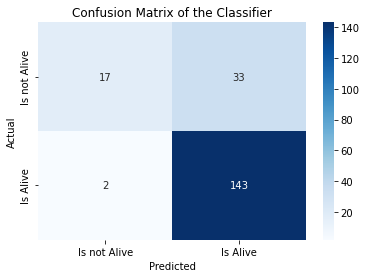

In [36]:
# Calling the visual_cm function
visual_cm(true_y =  y_test_full,
          pred_y = logreg_pred_full,
          labels = ['Is not Alive', 'Is Alive'])

In [37]:
# Train/test split with the full model
got_data_sig   = got.loc[ : , candidate_dict['logit_sig']]
got_target     = got.loc[: , 'isAlive']


# This is the exact code we were using before
x_train_sig, x_test_sig, y_train_sig, y_test_sig = train_test_split(
            got_data_sig,
            got_target,
            test_size    = 0.1,
            random_state = 219,
            stratify     = got_target)


# Instantiating a logistic regression model
logreg_sig = LogisticRegression(solver = 'lbfgs',
                            C = 1,
                            random_state = 219)


# Fitting the training data
logreg_fit_sig = logreg_sig.fit(x_train_sig, y_train_sig)


# Predicting based on the testing set
logreg_pred_sig = logreg_fit_sig.predict(x_test_sig)
 

# Scoring the results
print('Sig Training ACCURACY:', logreg_fit_sig.score(x_train_sig, y_train_sig).round(4))
print('Sig Testing  ACCURACY:', logreg_fit_sig.score(x_test_sig, y_test_sig).round(4))
print('AUC Score:', roc_auc_score(y_true  = y_test_sig, y_score = logreg_pred_sig).round(decimals = 4))

# Saving scoring data for future use
logreg_train_score_sig = logreg_fit_sig.score(x_train_sig, y_train_sig).round(4) # accuracy
logreg_test_score_sig  = logreg_fit_sig.score(x_test_sig, y_test_sig).round(4) # accuracy
logreg_auc_score_sig = roc_auc_score(y_true = y_test_sig, y_score = logreg_pred_sig).round(decimals = 4)

Sig Training ACCURACY: 0.7853
Sig Testing  ACCURACY: 0.8462
AUC Score: 0.7131


In [38]:
# Creating a confusion matrix
# unpacking the confusion matrix
logreg_sig_tn, \
logreg_sig_fp, \
logreg_sig_fn, \
logreg_sig_tp = confusion_matrix(y_true = y_test_sig, y_pred = logreg_pred_sig).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {logreg_sig_tn}
False Positives: {logreg_sig_fp}
False Negatives: {logreg_sig_fn}
True Positives : {logreg_sig_tp}
""")


True Negatives : 22
False Positives: 28
False Negatives: 2
True Positives : 143



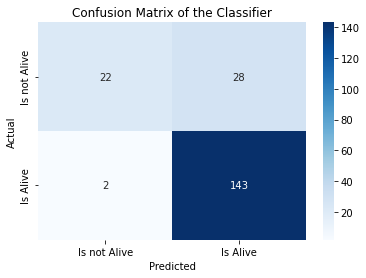

In [39]:
# calling the visual_cm function
visual_cm(true_y = y_test_sig,
          pred_y = logreg_pred_sig,
          labels = ['Is not Alive', 'Is Alive'])

Logistic Regression (Hyperparameter Tuning)

I will change all code for Hyperparameter Tuning to comment

In [40]:
from sklearn.model_selection import RandomizedSearchCV     # hyperparameter tuning
from sklearn.metrics import make_scorer              # customizable scorer


In [41]:
# RandomizedSearchCV

# Declaring a hyperparameter space
#C_range          = np.arange(0.1,3.0, 0.1)
#warm_start_range = [True, False]
#solver_range     = ['newton-cg', 'sag', 'lbfgs']


# Creating a hyperparameter grid
#param_grid = {'C'          : C_range,
              #'warm_start' : warm_start_range,
              #'solver'     : solver_range}


# Instantiating the model object without hyperparameters
#lr_tuned = LogisticRegression (random_state = 219,
                               #max_iter     = 1000) # increased for convergence


# GridSearchCV object
#lr_tuned_cv = RandomizedSearchCV(estimator           = lr_tuned,   # the model object
                                 #param_distributions = param_grid, # parameters to tune
                                 #cv                  = 3,          # how many folds in cross-validation
                                 #n_iter              = 250,        # number of combinations of hyperparameters to try
                                 #random_state        = 219,        # starting point for random sequence
                                 #scoring = make_scorer(roc_auc_score,
                                           #needs_threshold = False)) # scoring criteria (AUC)


# Fitting to the full dataset
#lr_tuned_cv.fit(got_data_full, got_target)


# PREDICT step is not needed


# Printing the optimal parameters and best score
#print("Tuned Parameters  :", lr_tuned_cv.best_params_)
#print("Tuned CV AUC      :", lr_tuned_cv.best_score_.round(4))

In [42]:
#lr_tuned_cv.best_estimator_

In [43]:
# Instantiating a logistic regression model
tuned_logreg_full = LogisticRegression (solver       = 'lbfgs',
                                        C            = 1.7000000000000002,
                                        max_iter     = 1000,
                                        warm_start   = True,
                                        random_state = 219)


# Fitting the training data
tuned_logreg_fit_full = tuned_logreg_full.fit(got_data_full, got_target)


# Predicting based on the testing set
tuned_logreg_pred_full = tuned_logreg_fit_full.predict(x_test_full)
 

# Scoring the results
print('Full Training ACCURACY:', tuned_logreg_fit_full.score(x_train_full, y_train_full).round(4))
print('Full Testing  ACCURACY:', tuned_logreg_fit_full.score(x_test_full, y_test_full).round(4))
print('AUC Score             :', roc_auc_score(y_true  = y_test_full, y_score = tuned_logreg_pred_full ).round(decimals = 4))

# Saving scoring data for future use
tuned_logreg_train_score_full = tuned_logreg_fit_full.score(x_train_full, y_train_full).round(4) # accuracy
tuned_logreg_test_score_full  = tuned_logreg_fit_full.score(x_test_full, y_test_full).round(4) # accuracy
tuned_logreg_auc_score_full = roc_auc_score(y_true  = y_test_full, y_score = tuned_logreg_pred_full ).round(decimals = 4)

Full Training ACCURACY: 0.7818
Full Testing  ACCURACY: 0.8513
AUC Score             : 0.7231


In [44]:
# Build a confusion matrix
# Unpacking the confusion matrix
tuned_logreg_full_tn, \
tuned_logreg_full_fp, \
tuned_logreg_full_fn, \
tuned_logreg_full_tp = confusion_matrix(y_true = y_test_full, y_pred = tuned_logreg_pred_full).ravel()


# Printing each result one-by-one
print(f"""
True Negatives : {tuned_logreg_full_tn}
False Positives: {tuned_logreg_full_fp}
False Negatives: {tuned_logreg_full_fn}
True Positives : {tuned_logreg_full_tp}
""")


True Negatives : 23
False Positives: 27
False Negatives: 2
True Positives : 143



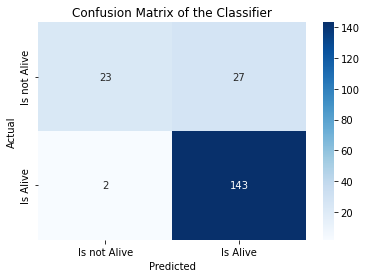

In [45]:
# calling the visual_cm function
visual_cm(true_y = y_test_full,
          pred_y = tuned_logreg_pred_full,
          labels = ['Is not Alive', 'Is Alive'])

In [46]:
# RandomizedSearchCV

# declaring a hyperparameter space
#C_range          = np.arange(0.1,3.0, 0.1)
#warm_start_range = [True, False]
#solver_range     = ['newton-cg', 'sag', 'lbfgs']


# creating a hyperparameter grid
#param_grid = {'C'          : C_range,
              #'warm_start' : warm_start_range,
              #'solver'     : solver_range}


# INSTANTIATING the model object without hyperparameters
#lr_tuned = LogisticRegression (random_state = 219,
                               #max_iter     = 1000) # increased for convergence


# GridSearchCV object
#lr_tuned_cv_sig = RandomizedSearchCV(estimator           = lr_tuned,   # the model object
                                 #param_distributions = param_grid, # parameters to tune
                                 #cv                  = 3,          # how many folds in cross-validation
                                 #n_iter              = 250,        # number of combinations of hyperparameters to try
                                 #random_state        = 219,        # starting point for random sequence
                                 #scoring = make_scorer(
                                           #roc_auc_score,
                                           #needs_threshold = False)) # scoring criteria (AUC)


# FITTING to the FULL DATASET (due to cross-validation)
#lr_tuned_cv_sig.fit(got_data_sig, got_target)


# PREDICT step is not needed


# printing the optimal parameters and best score
#print("Sig Tuned Parameters  :", lr_tuned_cv_sig.best_params_)
#print("Sig Tuned CV AUC      :", lr_tuned_cv_sig.best_score_.round(4))

In [47]:
#lr_tuned_cv_sig.best_estimator_

In [48]:
# Instantiating a logistic regression model
tuned_logreg_sig = LogisticRegression (solver       = 'newton-cg',
                                        C            = 1.4000000000000001,
                                        max_iter     = 1000,
                                        warm_start   = True,
                                        random_state = 219)


# Fitting the training data
tuned_logreg_fit_sig = tuned_logreg_sig.fit(got_data_sig, got_target) 


# Predicting based on the testing set
tuned_logreg_pred_sig = tuned_logreg_fit_sig.predict(x_test_sig)
 

# Scoring the results
print('Sig Training ACCURACY:', tuned_logreg_fit_sig.score(x_train_sig, y_train_sig).round(4))
print('Sig Testing  ACCURACY:', tuned_logreg_fit_sig.score(x_test_sig, y_test_sig).round(4))
print('AUC Score            :', roc_auc_score(y_true = y_test_sig, y_score = tuned_logreg_pred_sig ).round(decimals = 4))

# Saving scoring data for future use
tuned_logreg_train_score_sig = tuned_logreg_fit_sig.score(x_train_sig, y_train_sig).round(4) # accuracy
tuned_logreg_test_score_sig = tuned_logreg_fit_sig.score(x_test_sig, y_test_sig).round(4) # accuracy
tuned_logreg_auc_score_sig = roc_auc_score(y_true = y_test_sig, y_score = tuned_logreg_pred_sig).round(decimals = 4)

Sig Training ACCURACY: 0.7853
Sig Testing  ACCURACY: 0.8564
AUC Score            : 0.7462


In [49]:
# Build a confusion matrix
# Unpacking the confusion matrix
tuned_logreg_sig_tn, \
tuned_logreg_sig_fp, \
tuned_logreg_sig_fn, \
tuned_logreg_sig_tp = confusion_matrix(y_true = y_test_sig, y_pred = tuned_logreg_pred_sig).ravel()


# Printing each result one-by-one
print(f"""
True Negatives : {tuned_logreg_sig_tn}
False Positives: {tuned_logreg_sig_fp}
False Negatives: {tuned_logreg_sig_fn}
True Positives : {tuned_logreg_sig_tp}
""")


True Negatives : 26
False Positives: 24
False Negatives: 4
True Positives : 141



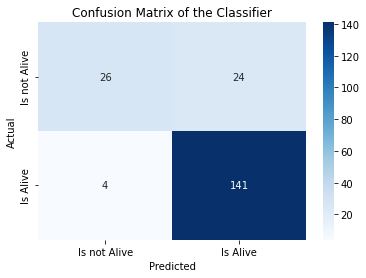

In [50]:
# Calling the visual_cm function
visual_cm(true_y = y_test_sig,
          pred_y = tuned_logreg_pred_sig,
          labels = ['Is not Alive', 'Is Alive'])

K-nearest Neighbors Classification

In [51]:
# optimal_neighbors
########################################
def optimal_neighbors(x_data,
                      y_data,
                      standardize   = True,
                      pct_test      = 0.1,
                      seed          = 219,
                      response_type ='reg',
                      max_neighbors = 20,
                      show_viz      = True):
    """
Exhaustively compute training and testing results for KNN across
[1, max_neighbors]. Outputs the maximum test score and (by default) a
visualization of the results.
PARAMETERS
----------
x_data        : explanatory variable data
y_data        : response variable
standardize   : whether or not to standardize the x data, default True
pct_test      : test size for training and validation from (0,1), default 0.25
seed          : random seed to be used in algorithm, default 219
response_type : type of neighbors algorithm to use, default 'reg'
    Use 'reg' for regression (KNeighborsRegressor)
    Use 'class' for classification (KNeighborsClassifier)
max_neighbors : maximum number of neighbors in exhaustive search, default 20
show_viz      : display or surpress k-neigbors visualization, default True
"""    
    
    
    if standardize == True:
        # optionally standardizing x_data
        scaler             = StandardScaler()
        scaler.fit(x_data)
        x_scaled           = scaler.transform(x_data)
        x_scaled_df        = pd.DataFrame(x_scaled)
        x_data             = x_scaled_df



    # train-test split
    x_train, x_test, y_train, y_test = train_test_split(x_data,
                                                        y_data,
                                                        test_size = pct_test,
                                                        random_state = seed)


    # creating lists for training set accuracy and test set accuracy
    training_accuracy = []
    test_accuracy = []
    
    
    # setting neighbor range
    neighbors_settings = range(1, max_neighbors + 1)


    for n_neighbors in neighbors_settings:
        # building the model based on response variable type
        if response_type == 'reg':
            clf = KNeighborsRegressor(n_neighbors = n_neighbors)
            clf.fit(x_train, y_train)
            
        elif response_type == 'class':
            clf = KNeighborsClassifier(n_neighbors = n_neighbors)
            clf.fit(x_train, y_train)            
            
        else:
            print("Error: response_type must be 'reg' or 'class'")
        
        
        # recording the training set accuracy
        training_accuracy.append(clf.score(x_train, y_train))
    
        # recording the generalization accuracy
        test_accuracy.append(clf.score(x_test, y_test))


    # optionally displaying visualization
    if show_viz == True:
        # plotting the visualization
        fig, ax = plt.subplots(figsize=(12,8))
        plt.plot(neighbors_settings, training_accuracy, label = "training accuracy")
        plt.plot(neighbors_settings, test_accuracy, label = "test accuracy")
        plt.ylabel("Accuracy")
        plt.xlabel("n_neighbors")
        plt.legend()
        plt.show()
    
    
    # returning optimal number of neighbors
    print(f"The optimal number of neighbors is: {test_accuracy.index(max(test_accuracy))+1}")
    return test_accuracy.index(max(test_accuracy))+1

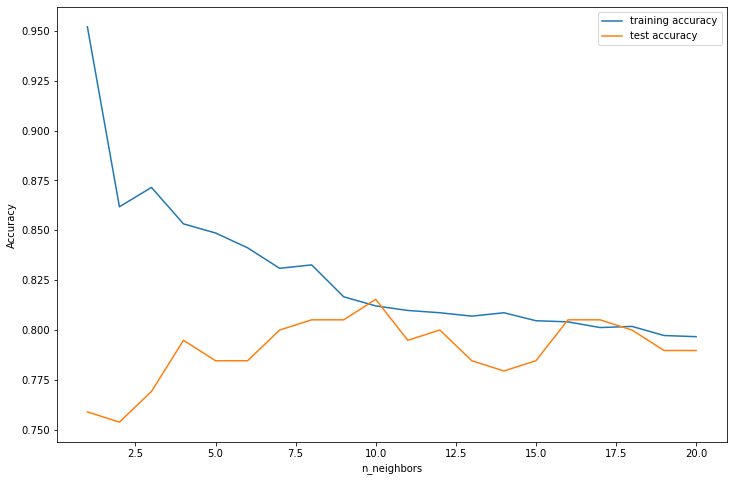

The optimal number of neighbors is: 10


In [52]:
# determining the optimal number of neighbors
opt_neighbors = optimal_neighbors(x_data = got_data_full,
                                y_data = got_target,
                                response_type = 'class')

In [53]:
# Instantiating StandardScaler()
scaler = StandardScaler()


# Fitting the data
scaler.fit(got_data_full)


# Transforming the data
x_scaled     = scaler.transform(got_data_full)


# Converting to a DataFrame
x_scaled_df  = pd.DataFrame(x_scaled) 


# Train-test split with the scaled data
x_train_scaled, x_test_scaled, y_train_scaled, y_test_scaled = train_test_split(
            x_scaled_df,
            got_target,
            random_state = 219,
            test_size    = 0.1,
            stratify     = got_target)


# Instantiating a KNN classification model with optimal neighbors
full_knn_opt = KNeighborsClassifier(n_neighbors = opt_neighbors)


# Fitting the training data
full_knn_fit = full_knn_opt.fit(x_train_scaled, y_train_scaled)


# Predicting based on the testing set
full_knn_pred = full_knn_fit.predict(x_test_scaled)


# Scoring the results
print('Full Training ACCURACY:', full_knn_fit.score(x_train_scaled, y_train_scaled).round(4))
print('Full Testing  ACCURACY:', full_knn_fit.score(x_test_scaled, y_test_scaled).round(4))
print('AUC Score             :', roc_auc_score(y_true = y_test_scaled, y_score = full_knn_pred).round(4))


# Saving scoring data
full_knn_train_score = full_knn_fit.score(x_train_scaled, y_train_scaled).round(4)
full_knn_test_score  = full_knn_fit.score(x_test_scaled, y_test_scaled).round(4)
full_knn_auc_score   = roc_auc_score(y_true = y_test_scaled, y_score = full_knn_pred).round(4)

Full Training ACCURACY: 0.8218
Full Testing  ACCURACY: 0.7744
AUC Score             : 0.6517


In [54]:
# Build a confusion matrix
# Unpacking the confusion matrix
full_tuned_knn_tn, \
full_tuned_knn_fp, \
full_tuned_knn_fn, \
full_tuned_knn_tp = confusion_matrix(y_true = y_test_scaled, y_pred = full_knn_pred).ravel()


# Printing each result one-by-one
print(f"""
True Negatives : {full_tuned_knn_tn}
False Positives: {full_tuned_knn_fp}
False Negatives: {full_tuned_knn_fn}
True Positives : {full_tuned_knn_tp}
""")


True Negatives : 20
False Positives: 30
False Negatives: 14
True Positives : 131



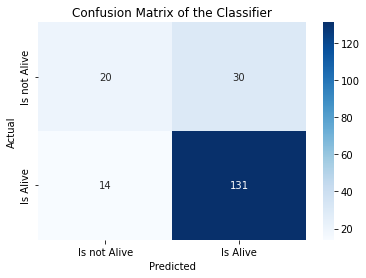

In [55]:
# Calling the visual_cm function
visual_cm(true_y = y_test_scaled,
          pred_y = full_knn_pred,
          labels = ['Is not Alive', 'Is Alive'])

I decide to use the parameter that tune with the full data set because it gives high AUC score.

In [56]:
# Instantiating StandardScaler()
sig_scaler = StandardScaler()


# Fitting the data
sig_scaler.fit(got_data_sig)


# Transforming the data
x_scaled_sig     = sig_scaler.transform(got_data_sig)


# Converting to a DataFrame
x_scaled_sig_df  = pd.DataFrame(x_scaled_sig) 


# Train-test split with the scaled data
x_train_scaled_sig, x_test_scaled_sig, y_train_scaled_sig, y_test_scaled_sig = train_test_split(
            x_scaled_sig_df,
            got_target,
            random_state = 219,
            test_size    = 0.1,
            stratify     = got_target)


# Instantiating a KNN classification model with optimal neighbors
sig_knn_opt = KNeighborsClassifier(n_neighbors = opt_neighbors)


# Fitting the training data
sig_knn_fit = sig_knn_opt.fit(x_train_scaled_sig, y_train_scaled_sig)


# Predicting based on the testing set
sig_knn_pred = sig_knn_fit.predict(x_test_scaled_sig)


# SCORING the results
print('Sig Training ACCURACY:', sig_knn_fit.score(x_train_scaled_sig, y_train_scaled_sig).round(4))
print('Sig Testing  ACCURACY:', sig_knn_fit.score(x_test_scaled_sig, y_test_scaled_sig).round(4))
print('AUC Score            :', roc_auc_score(y_true = y_test_scaled_sig, y_score = sig_knn_pred).round(4))


# saving scoring data
sig_knn_train_score = sig_knn_fit.score(x_train_scaled_sig, y_train_scaled_sig).round(4)
sig_knn_test_score  = sig_knn_fit.score(x_test_scaled_sig, y_test_scaled_sig).round(4)
sig_knn_auc_score   = roc_auc_score(y_true = y_test_scaled_sig, y_score = sig_knn_pred).round(4)

Sig Training ACCURACY: 0.7207
Sig Testing  ACCURACY: 0.7744
AUC Score            : 0.7238


In [57]:
# Build a confusion matrix
# Unpacking the confusion matrix
sig_tuned_knn_tn, \
sig_tuned_knn_fp, \
sig_tuned_knn_fn, \
sig_tuned_knn_tp = confusion_matrix(y_true = y_test_scaled_sig, y_pred = sig_knn_pred).ravel()


# Printing each result one-by-one
print(f"""
True Negatives : {sig_tuned_knn_tn}
False Positives: {sig_tuned_knn_fp}
False Negatives: {sig_tuned_knn_fn}
True Positives : {sig_tuned_knn_tp}
""")


True Negatives : 31
False Positives: 19
False Negatives: 25
True Positives : 120



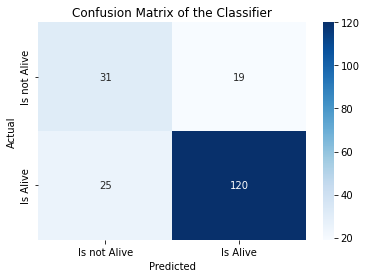

In [58]:
# Calling the visual_cm function
visual_cm(true_y = y_test_scaled_sig,
          pred_y = sig_knn_pred,
          labels = ['Is not Alive', 'Is Alive'])

Classification Tree

In [59]:
# plot_feature_importances
########################################
def plot_feature_importances(model, train, export = False):
    """
    Plots the importance of features from a CART model.
    
    PARAMETERS
    ----------
    model  : CART model
    train  : explanatory variable training data
    export : whether or not to export as a .png image, default False
    """
    
    # declaring the number
    n_features = x_train.shape[1]
    
    # setting plot window
    fig, ax = plt.subplots(figsize=(12,9))
    
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), train.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    
    if export == True:
        plt.savefig('Tree_Leaf_50_Feature_Importance.png')

In [60]:
# Instantiating a classification tree object
full_tree = DecisionTreeClassifier(random_state = 219 )


# Fitting the training data
full_tree_fit = full_tree.fit(x_train_full, y_train_full)


# Predicting on new data
full_tree_pred = full_tree_fit.predict(x_test_full)


# Scoring the model
print('Full Tree Training ACCURACY:', full_tree_fit.score(x_train_full, y_train_full).round(4))

print('Full Tree Testing ACCURACY :', full_tree_fit.score(x_test_full, y_test_full).round(4))

print('Full Tree AUC Score:', roc_auc_score(y_true = y_test_full, y_score = full_tree_pred).round(4))


# Saving scoring data for future use
full_tree_train_score = full_tree_fit.score(x_train_full, y_train_full).round(4) # accuracy
full_tree_test_score  = full_tree_fit.score(x_test_full, y_test_full).round(4)   # accuracy
full_tree_auc_score   = roc_auc_score(y_true = y_test_full, y_score = full_tree_pred).round(4) # auc

Full Tree Training ACCURACY: 0.9634
Full Tree Testing ACCURACY : 0.7538
Full Tree AUC Score: 0.7034


In [61]:
# Build a confusion matrx
# Unpacking the confusion matrix
full_tree_tn, \
full_tree_fp, \
full_tree_fn, \
full_tree_tp = confusion_matrix(y_true = y_test_full, y_pred = full_tree_pred).ravel()


# Printing each result one-by-one
print(f"""
True Negatives : {full_tree_tn}
False Positives: {full_tree_fp}
False Negatives: {full_tree_fn}
True Positives : {full_tree_tp}
""")


True Negatives : 30
False Positives: 20
False Negatives: 28
True Positives : 117



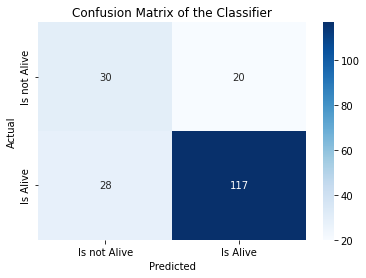

In [62]:
# Calling the visual_cm function
visual_cm(true_y = y_test_full,
          pred_y = full_tree_pred,
          labels = ['Is not Alive', 'Is Alive'])

In [63]:
# Instantiating a classification tree object
sig_tree = DecisionTreeClassifier(random_state = 219 )


# Fitting the training data
sig_tree_fit = sig_tree.fit(x_train_sig, y_train_sig)


# Predicting on new data
sig_tree_pred = sig_tree_fit.predict(x_test_sig)


# Scoring the model
print('Sig Tree Training ACCURACY:', sig_tree_fit.score(x_train_sig, y_train_sig).round(4))

print('Sig Tree Testing ACCURACY :', sig_tree_fit.score(x_test_sig, y_test_sig).round(4))

print('Sig Tree AUC Score        :', roc_auc_score(y_true = y_test_sig, y_score = sig_tree_pred).round(4))


# Saving scoring data for future use
sig_tree_train_score = sig_tree_fit.score(x_train_sig, y_train_sig).round(4) # accuracy
sig_tree_test_score  = sig_tree_fit.score(x_test_sig, y_test_sig).round(4)   # accuracy
sig_tree_auc_score   = roc_auc_score(y_true = y_test_sig, y_score = sig_tree_pred).round(4) # auc

Sig Tree Training ACCURACY: 0.8075
Sig Tree Testing ACCURACY : 0.841
Sig Tree AUC Score        : 0.7162


In [64]:
# Build a confusion matrix
# Unpacking the confusion matrix
sig_tree_tn, \
sig_tree_fp, \
sig_tree_fn, \
sig_tree_tp = confusion_matrix(y_true = y_test_sig, y_pred = sig_tree_pred).ravel()


# Printing each result one-by-one
print(f"""
True Negatives : {sig_tree_tn}
False Positives: {sig_tree_fp}
False Negatives: {sig_tree_fn}
True Positives : {sig_tree_tp}
""")


True Negatives : 23
False Positives: 27
False Negatives: 4
True Positives : 141



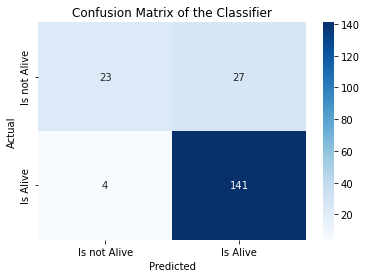

In [65]:
# Calling the visual_cm function
visual_cm(true_y = y_test_sig,
          pred_y = sig_tree_pred,
          labels = ['Is not Alive', 'Is Alive'])

Classification Tree (Hyperparameter tuning)

In [66]:
# declaring a hyperparameter space
#criterion_range = ['gini', 'entropy']
#splitter_range  = ['best', 'random']
#depth_range     = np.arange(1, 8, 1)
#leaf_range      = np.arange(1, 100, 1)

# Creating a hyperparameter grid
#param_grid = {'criterion'        : criterion_range,
              #'splitter'         : splitter_range,
              #'max_depth'        : depth_range,
              #'min_samples_leaf' : leaf_range}


# Instantiating the model object without hyperparameters
#tuned_tree = DecisionTreeClassifier(random_state = 219)


# RandomizedSearchCV object
#tuned_tree_cv = RandomizedSearchCV(estimator             = tuned_tree,
                                   #param_distributions   = param_grid,
                                   #cv                    = 3,
                                   #n_iter                = 1000,
                                   #random_state          = 219,
                                   #scoring = make_scorer(roc_auc_score, needs_threshold = False))


# Fitting to the FULL DATASET 
#tuned_tree_cv.fit(got_data_full, got_target)


# PREDICT step is not needed


# Printing the optimal parameters and best score
#print("Tuned Parameters  :", tuned_tree_cv.best_params_)
#print("Tuned Training AUC:", tuned_tree_cv.best_score_.round(4))

In [67]:
#tuned_tree_cv.best_estimator_

In [68]:
# INSTANTIATING a classification tree object
full_tuned_tree = DecisionTreeClassifier(criterion        = 'gini',
                                         splitter         = 'best',
                                         min_samples_leaf = 6,
                                         max_depth        = 7,
                                         random_state     = 219 )


# FITTING the training data
full_tuned_tree_fit = full_tuned_tree.fit(x_train_full, y_train_full)


# PREDICTING on new data
full_tuned_tree_pred = full_tuned_tree_fit.predict(x_test_full)


# SCORING the model
print('Full Tree Training ACCURACY:', full_tuned_tree_fit.score(x_train_full, y_train_full).round(4))

print('Full Tree Testing ACCURACY :', full_tuned_tree_fit.score(x_test_full, y_test_full).round(4))

print('Full Tree AUC Score        :', roc_auc_score(y_true = y_test_full, y_score = full_tuned_tree_pred).round(4))


# saving scoring data for future use
full_tuned_tree_train_score = full_tuned_tree_fit.score(x_train_full, y_train_full).round(4) # accuracy
full_tuned_tree_test_score  = full_tuned_tree_fit.score(x_test_full, y_test_full).round(4)   # accuracy
full_tuned_tree_auc_score   = roc_auc_score(y_true = y_test_full, y_score = full_tuned_tree_pred).round(4) # auc

Full Tree Training ACCURACY: 0.8327
Full Tree Testing ACCURACY : 0.8564
Full Tree AUC Score        : 0.7659


In [69]:
# unpacking the confusion matrix
full_tuned_tree_tn, \
full_tuned_tree_fp, \
full_tuned_tree_fn, \
full_tuned_tree_tp = confusion_matrix(y_true = y_test_full, y_pred = full_tuned_tree_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {full_tuned_tree_tn}
False Positives: {full_tuned_tree_fp}
False Negatives: {full_tuned_tree_fn}
True Positives : {full_tuned_tree_tp}
""")


True Negatives : 29
False Positives: 21
False Negatives: 7
True Positives : 138



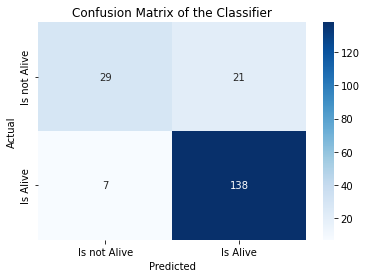

In [70]:
# calling the visual_cm function
visual_cm(true_y = y_test_full,
          pred_y = full_tuned_tree_pred,
          labels = ['Is not Alive', 'Is Alive'])

In [71]:
# declaring a hyperparameter space
#criterion_range = ['gini', 'entropy']
#splitter_range  = ['best', 'random']
#depth_range     = np.arange(1, 8, 1)
#leaf_range      = np.arange(1, 100, 1)

# creating a hyperparameter grid
#param_grid = {'criterion'        : criterion_range,
              #'splitter'         : splitter_range,
              #'max_depth'        : depth_range,
              #'min_samples_leaf' : leaf_range}


# INSTANTIATING the model object without hyperparameters
#tuned_tree_sig = DecisionTreeClassifier(random_state = 219)


# RandomizedSearchCV object
#tuned_tree_cv_sig = RandomizedSearchCV(estimator         = tuned_tree,
                                   #param_distributions   = param_grid,
                                   #cv                    = 3,
                                   #n_iter                = 1000,
                                   #random_state          = 219,
                                   #scoring = make_scorer(roc_auc_score, needs_threshold = False))


# FITTING to the FULL DATASET (due to cross-validation)
#tuned_tree_cv_sig.fit(got_data_sig, got_target)


# PREDICT step is not needed


# printing the optimal parameters and best score
#print("Sig Tuned Parameters  :", tuned_tree_cv_sig.best_params_)
#print("Sig Tuned Training AUC:", tuned_tree_cv_sig.best_score_.round(4))

In [72]:
#tuned_tree_cv_sig.best_estimator_

In [73]:
# Instantiating a classification tree object
sig_tuned_tree = DecisionTreeClassifier(criterion         = 'gini',
                                         splitter         = 'best',
                                         min_samples_leaf = 3,
                                         max_depth        = 6,
                                         random_state     = 219 )


# Fitting the training data
sig_tuned_tree_fit = sig_tuned_tree.fit(x_train_sig, y_train_sig)


# Predicting on new data
sig_tuned_tree_pred = sig_tuned_tree_fit.predict(x_test_sig)


# Scoring the model
print('Sig Tree Training ACCURACY:', sig_tuned_tree_fit.score(x_train_sig, y_train_sig).round(4))

print('Sig Tree Testing ACCURACY :', sig_tuned_tree_fit.score(x_test_sig, y_test_sig).round(4))

print('Sig Tree AUC Score        :', roc_auc_score(y_true = y_test_sig, y_score = sig_tuned_tree_pred).round(4))


# Saving scoring data for future use
sig_tuned_tree_train_score =  sig_tuned_tree_fit.score(x_train_sig, y_train_sig).round(4) # accuracy
sig_tuned_tree_test_score  =  sig_tuned_tree_fit.score(x_test_sig, y_test_sig).round(4)   # accuracy
sig_tuned_tree_auc_score   = roc_auc_score(y_true = y_test_sig, y_score = sig_tuned_tree_pred).round(4) # auc

Sig Tree Training ACCURACY: 0.7973
Sig Tree Testing ACCURACY : 0.841
Sig Tree AUC Score        : 0.7162


In [74]:
# Build a confusion matrix
# Unpacking the confusion matrix
sig_tuned_tree_tn, \
sig_tuned_tree_fp, \
sig_tuned_tree_fn, \
sig_tuned_tree_tp = confusion_matrix(y_true = y_test_sig, y_pred = sig_tuned_tree_pred).ravel()


# Printing each result one-by-one
print(f"""
True Negatives : {sig_tuned_tree_tn}
False Positives: {sig_tuned_tree_fp}
False Negatives: {sig_tuned_tree_fn}
True Positives : {sig_tuned_tree_tp}
""")


True Negatives : 23
False Positives: 27
False Negatives: 4
True Positives : 141



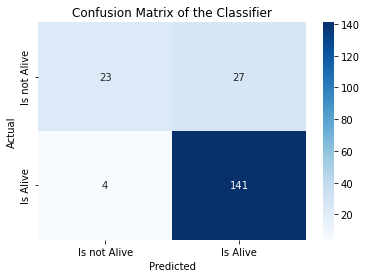

In [75]:
# Calling the visual_cm function
visual_cm(true_y = y_test_sig,
          pred_y = sig_tuned_tree_pred,
          labels = ['Is not Alive', 'Is Alive'])

Random Forest

In [76]:
from sklearn.ensemble import RandomForestClassifier     # random forest
from sklearn.ensemble import GradientBoostingClassifier # gbm

In [77]:
# INSTANTIATING a random forest model with default values
full_rf = RandomForestClassifier(random_state  = 219)

# FITTING the training data
full_rf_fit = full_rf.fit(x_train_full, y_train_full)


# PREDICTING based on the testing set
full_rf_pred = full_rf_fit.predict(x_test_full)


# SCORING the results
print('Full Training ACCURACY:', full_rf_fit.score(x_train_full, y_train_full).round(4))
print('Full Testing  ACCURACY:', full_rf_fit.score(x_test_full, y_test_full).round(4))
print('AUC Score             :', roc_auc_score(y_true = y_test_full, y_score = full_rf_pred).round(4))

# Saving for future use
full_rf_train_score =  full_rf_fit.score(x_train_full, y_train_full).round(4) # accuracy
full_rf_test_score  =  full_rf_fit.score(x_test_full, y_test_full).round(4)   # accuracy
full_rf_auc_score   = roc_auc_score(y_true  = y_test_full, y_score = full_rf_pred).round(4) # auc

Full Training ACCURACY: 0.9634
Full Testing  ACCURACY: 0.841
AUC Score             : 0.7817


In [78]:
# unpacking the confusion matrix
full_rf_tn, \
full_rf_fp, \
full_rf_fn, \
full_rf_tp = confusion_matrix(y_true = y_test_full, y_pred = full_rf_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {full_rf_tn}
False Positives: {full_rf_fp}
False Negatives: {full_rf_fn}
True Positives : {full_rf_tp}
""")


True Negatives : 33
False Positives: 17
False Negatives: 14
True Positives : 131



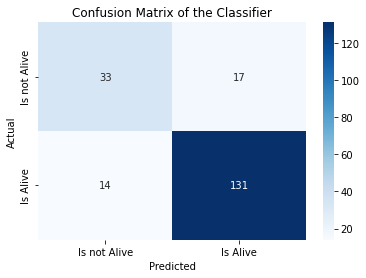

In [79]:
# Calling the visual_cm function
visual_cm(true_y = y_test_full,
          pred_y = full_rf_pred,
          labels = ['Is not Alive', 'Is Alive'])

In [80]:
# InstantiatingINSTANTIATING a random forest model with default values
sig_rf = RandomForestClassifier(random_state  = 219)

# Fitting the training data
sig_rf_fit = sig_rf.fit(x_train_sig, y_train_sig)


# Predicting based on the testing set
sig_rf_pred = sig_rf_fit.predict(x_test_sig)


# Scoring the results
print('Sig Training ACCURACY:', sig_rf_fit.score(x_train_sig, y_train_sig).round(4))
print('Sig Testing  ACCURACY:', sig_rf_fit.score(x_test_sig, y_test_sig).round(4))
print('AUC Score            :', roc_auc_score(y_true = y_test_sig, y_score = sig_rf_pred).round(4))

# Saving for future use
sig_rf_train_score =  sig_rf_fit.score(x_train_sig, y_train_sig).round(4) # accuracy
sig_rf_test_score =  sig_rf_fit.score(x_test_sig, y_test_sig).round(4)   # accuracy
sig_rf_auc_score =  roc_auc_score(y_true  = y_test_sig, y_score = sig_rf_pred).round(4) # auc

Sig Training ACCURACY: 0.8075
Sig Testing  ACCURACY: 0.841
AUC Score            : 0.7097


In [81]:
# Build a confusion matrix
# Unpacking the confusion matrix
sig_rf_tn, \
sig_rf_fp, \
sig_rf_fn, \
sig_rf_tp = confusion_matrix(y_true = y_test_sig, y_pred = sig_rf_pred).ravel()


# Printing each result one-by-one
print(f"""
True Negatives : {sig_rf_tn}
False Positives: {sig_rf_fp}
False Negatives: {sig_rf_fn}
True Positives : {sig_rf_tp}
""")


True Negatives : 22
False Positives: 28
False Negatives: 3
True Positives : 142



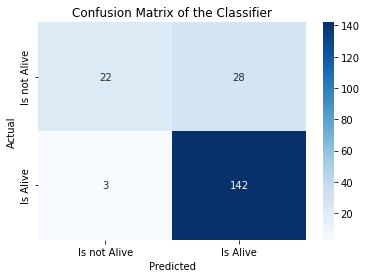

In [82]:
# Calling the visual_cm function
visual_cm(true_y = y_test_sig,
          pred_y = sig_rf_pred,
          labels = ['Is not Alive', 'Is Alive'])

Random Forest (Hyperparameter tuning)

In [83]:
# declaring a hyperparameter space
#estimator_range  = np.arange(100, 1200, 300)
#leaf_range       = np.arange(1, 20, 10)
#criterion_range  = ['gini', 'entropy']
#bootstrap_range  = [True, False]
#warm_start_range = [True, False]
#depth_range      = np.arange(1, 8, 1)


# Creating a hyperparameter grid
#param_grid = {'n_estimators'     : estimator_range,
              #'min_samples_leaf' : leaf_range,
              #'criterion'        : criterion_range,
              #'bootstrap'        : bootstrap_range,
              #'warm_start'       : warm_start_range,
               #'max_depth'       : depth_range}


# Instantiating the model object without hyperparameters
#forest_grid = RandomForestClassifier(random_state = 219)


# GridSearchCV object
#forest_cv = RandomizedSearchCV(estimator           = forest_grid,
                               #param_distributions = param_grid,
                               #cv                  = 3,
                               #n_iter              = 1000,
                               #scoring    = make_scorer(roc_auc_score, needs_threshold = False))


# Fitting to the FULL DATASET (due to cross-validation)
#forest_cv.fit(got_data_full, got_target)


# PREDICT step is not needed


# Printing the optimal parameters and best score
#print("Full Tuned Parameters  :", forest_cv.best_params_)
#print("FUll Tuned Training AUC:", forest_cv.best_score_.round(4))

In [84]:
#forest_cv.best_estimator_

In [85]:
_# INSTANTIATING a random forest model with default values
full_tuned_rf = RandomForestClassifier(n_estimators   = 400,
                                    criterion        = 'entropy',
                                    max_depth        = 7,
                                    min_samples_leaf = 1,
                                    bootstrap        = False,
                                    warm_start       = True,
                                    random_state     = 219)
# FITTING the training data
full_tuned_rf_fit = full_tuned_rf.fit(x_train_full, y_train_full)


# PREDICTING based on the testing set
full_tuned_rf_pred = full_tuned_rf_fit.predict(x_test_full)


# SCORING the results
print('Full Training ACCURACY:', full_tuned_rf_fit.score(x_train_full, y_train_full).round(4))
print('Full Testing  ACCURACY:', full_tuned_rf_fit.score(x_test_full, y_test_full).round(4))
print('AUC Score             :', roc_auc_score(y_true = y_test_full, y_score = full_tuned_rf_pred).round(4))

# Saving for future use
full_tuned_rf_train_score =  full_tuned_rf_fit.score(x_train_full, y_train_full).round(4) # accuracy
full_tuned_rf_test_score =  full_tuned_rf_fit.score(x_test_full, y_test_full).round(4)   # accuracy
full_tuned_rf_auc_score =  roc_auc_score(y_true = y_test_full, y_score = full_tuned_rf_pred).round(4) # auc

Full Training ACCURACY: 0.8332
Full Testing  ACCURACY: 0.8667
AUC Score             : 0.7466


In [86]:
# Build a confusion matrix
# Unpacking the confusion matrix
full_tuned_rf_tn, \
full_tuned_rf_fp, \
full_tuned_rf_fn, \
full_tuned_rf_tp = confusion_matrix(y_true = y_test_full, y_pred = full_tuned_rf_pred).ravel()


# Printing each result one-by-one
print(f"""
True Negatives : {full_tuned_rf_tn}
False Positives: {full_tuned_rf_fp}
False Negatives: {full_tuned_rf_fn}
True Positives : {full_tuned_rf_tp}
""")


True Negatives : 25
False Positives: 25
False Negatives: 1
True Positives : 144



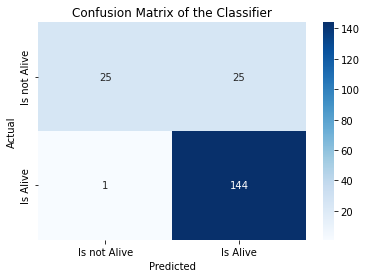

In [87]:
# Calling the visual_cm function
visual_cm(true_y = y_test_full,
          pred_y = full_tuned_rf_pred,
          labels = ['Is not Alive', 'Is Alive'])

In [88]:
# Declaring a hyperparameter space
#estimator_range  = np.arange(100, 1200, 300)
#leaf_range       = np.arange(1, 20, 10)
#criterion_range  = ['gini', 'entropy']
#bootstrap_range  = [True, False]
#warm_start_range = [True, False]
#depth_range      = np.arange(1, 8, 1)


# Creating a hyperparameter grid
#param_grid = {'n_estimators'     : estimator_range,
              #'min_samples_leaf' : leaf_range,
              #'criterion'        : criterion_range,
              #'bootstrap'        : bootstrap_range,
              #'warm_start'       : warm_start_range,
              # 'max_depth'       : depth_range}


# Instantiating the model object without hyperparameters
#forest_grid = RandomForestClassifier(random_state = 219)


# GridSearchCV object
#forest_cv_sig = RandomizedSearchCV(estimator           = forest_grid,
                               #param_distributions = param_grid,
                               #cv                  = 3,
                               #n_iter              = 1000,
                               #scoring    = make_scorer(roc_auc_score, needs_threshold = False))


# Fitting to the FULL DATASET (due to cross-validation)
#forest_cv_sig.fit(got_data_sig, got_target)


# PREDICT step is not needed


# printing the optimal parameters and best score
#print("Sig Tuned Parameters  :", forest_cv.best_params_)
#print("Sig Tuned Training AUC:", forest_cv.best_score_.round(4))

In [89]:
#forest_cv_sig.best_estimator_

In [90]:
_# INSTANTIATING a random forest model with default values
sig_tuned_rf = RandomForestClassifier(n_estimators    = 400,
                                    criterion        = 'entropy',
                                    max_depth        = 7,
                                    min_samples_leaf = 1,
                                    bootstrap        = False,
                                    warm_start       = True,
                                    random_state     = 219)
# Fitting the training data
sig_tuned_rf_fit = sig_tuned_rf.fit(x_train_sig, y_train_sig)


# Predicting based on the testing set
sig_tuned_rf_pred = sig_tuned_rf_fit.predict(x_test_sig)


# Scoring the results
print('Sig Training ACCURACY:', sig_tuned_rf_fit.score(x_train_sig, y_train_sig).round(4))
print('Sig Testing  ACCURACY:', sig_tuned_rf_fit.score(x_test_sig, y_test_sig).round(4))
print('AUC Score            :', roc_auc_score(y_true  = y_test_sig, y_score = sig_tuned_rf_pred).round(4))

# Saving for future use
sig_tuned_rf_train_score = sig_tuned_rf_fit.score(x_train_sig, y_train_sig).round(4) # accuracy
sig_tuned_rf_test_score =  sig_tuned_rf_fit.score(x_test_sig, y_test_sig).round(4)   # accuracy
sig_tuned_rf_auc_score  =  roc_auc_score(y_true = y_test_sig, y_score = sig_tuned_rf_pred).round(4) # auc

Sig Training ACCURACY: 0.8064
Sig Testing  ACCURACY: 0.841
AUC Score            : 0.7031


In [91]:
# Build a confustion matrix
# Unpacking the confusion matrix
sig_tuned_rf_tn, \
sig_tuned_rf_fp, \
sig_tuned_rf_fn, \
sig_tuned_rf_tp = confusion_matrix(y_true = y_test_sig, y_pred = sig_tuned_rf_pred).ravel()


# Printing each result one-by-one
print(f"""
True Negatives : {sig_tuned_rf_tn}
False Positives: {sig_tuned_rf_fp}
False Negatives: {sig_tuned_rf_fn}
True Positives : {sig_tuned_rf_tp}
""")


True Negatives : 21
False Positives: 29
False Negatives: 2
True Positives : 143



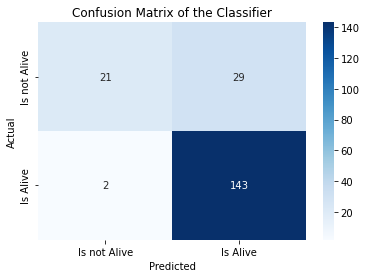

In [92]:
# Calling the visual_cm function
visual_cm(true_y = y_test_sig,
          pred_y = sig_tuned_rf_pred,
          labels = ['Is not Alive', 'Is Alive'])

Gradient Boosted Machines

In [93]:
# Instantiating the model object without hyperparameters
full_gbm = GradientBoostingClassifier(random_state  = 219)


# Fitting the training data
full_gbm_fit = full_gbm.fit(x_train_full, y_train_full)


# Predicting based on the testing set
full_gbm_pred = full_gbm_fit.predict(x_test_full)


# Scoring the results
print('Full Training ACCURACY:', full_gbm_fit.score(x_train_full, y_train_full).round(4))
print('Full Testing ACCURACY :', full_gbm_fit.score(x_test_full, y_test_full).round(4))
print('AUC Score             :', roc_auc_score(y_true = y_test, y_score = full_gbm_pred).round(4))

# Saving for future use
full_gbm_train_score =  full_gbm_fit.score(x_train_full, y_train_full).round(4) # accuracy
full_gbm_test_score =  full_gbm_fit.score(x_test_full, y_test_full).round(4)   # accuracy
full_gbm_auc_score =  roc_auc_score(y_true = y_test_full, y_score = full_gbm_pred).round(4) # auc

Full Training ACCURACY: 0.8487
Full Testing ACCURACY : 0.8513
AUC Score             : 0.7624


In [94]:
# Build a confusion matrix
# unpacking the confusion matrix
full_gbm_tn, \
full_gbm_fp, \
full_gbm_fn, \
full_gbm_tp = confusion_matrix(y_true = y_test_full, y_pred = full_gbm_pred).ravel()


# Printing each result one-by-one
print(f"""
True Negatives : {full_gbm_tn}
False Positives: {full_gbm_fp}
False Negatives: {full_gbm_fn}
True Positives : {full_gbm_tp}
""")


True Negatives : 29
False Positives: 21
False Negatives: 8
True Positives : 137



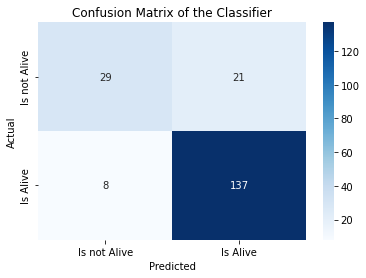

In [95]:
# calling the visual_cm function
visual_cm(true_y = y_test_full,
          pred_y = full_gbm_pred,
          labels = ['Is not Alive', 'Is Alive'])

In [96]:
# Instantiating the model object without hyperparameters
sig_gbm = GradientBoostingClassifier(random_state  = 219)


# Fitting the training data
sig_gbm_fit = sig_gbm.fit(x_train_sig, y_train_sig)


# Predicting based on the testing set
sig_gbm_pred = sig_gbm_fit.predict(x_test_sig)


# SCORING the results
print('Full Training ACCURACY:', sig_gbm_fit.score(x_train_sig, y_train_sig).round(4))
print('Full Testing ACCURACY :', sig_gbm_fit.score(x_test_sig, y_test_sig).round(4))
print('AUC Score             :', roc_auc_score(y_true = y_test_sig, y_score = sig_gbm_pred).round(4))

# Saving for future use
sig_gbm_train_score =  sig_gbm_fit.score(x_train_sig, y_train_sig).round(4) # accuracy
sig_gbm_test_score =  sig_gbm_fit.score(x_test_sig, y_test_sig).round(4)   # accuracy
sig_gbm_auc_score =  roc_auc_score(y_true = y_test_sig, y_score = sig_gbm_pred).round(4) # auc

Full Training ACCURACY: 0.7995
Full Testing ACCURACY : 0.8462
AUC Score             : 0.7131


In [97]:
# Build a confusion matrix
# Unpacking the confusion matrix
sig_gbm_tn, \
sig_gbm_fp, \
sig_gbm_fn, \
sig_gbm_tp = confusion_matrix(y_true = y_test_sig, y_pred = sig_gbm_pred).ravel()


# Printing each result one-by-one
print(f"""
True Negatives : {sig_gbm_tn}
False Positives: {sig_gbm_fp}
False Negatives: {sig_gbm_fn}
True Positives : {sig_gbm_tp}
""")


True Negatives : 22
False Positives: 28
False Negatives: 2
True Positives : 143



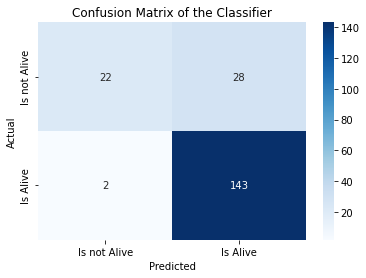

In [98]:
# Calling the visual_cm function
visual_cm(true_y = y_test_sig,
          pred_y = sig_gbm_pred,
          labels = ['Is not Alive', 'Is Alive'])

Gradient Boosted Machines (hyperparameter)

In [99]:
# declaring a hyperparameter space
#learn_range        = np.arange(0.1, 2.0, 0.5)
#estimator_range    = np.arange(100, 300, 25)
#depth_range        = np.arange(1, 8, 1)
#warm_start_range   = [True,False]
#loss_range         = ['deviance', 'exponential']
#criterion_range    = ['friedman_mse', 'mse', 'mae']

# creating a hyperparameter grid
#param_grid = {'learning_rate' : learn_range,
              #'n_estimators'  : estimator_range,
              #'max_depth'     : depth_range,
               #'warm_start'   : warm_start_range,
               #'loss'         : loss_range,
              #'criterion'     : criterion_range}


# INSTANTIATING the model object without hyperparameters
#full_gbm_grid = GradientBoostingClassifier(random_state = 219)


# GridSearchCV object
#full_gbm_cv = RandomizedSearchCV(estimator = full_gbm_grid,
                                 #param_distributions = param_grid,
                                 #cv                  = 3,
                                 #n_iter              = 500,
                                 #random_state        = 219,
                                 #scoring             = make_scorer(roc_auc_score,
                                                       #needs_threshold = False))


# FITTING to the FULL DATASET (due to cross-validation)
#full_gbm_cv.fit(got_data_full, got_target)


# PREDICT step is not needed


# printing the optimal parameters and best score
#print("Tuned Parameters  :", full_gbm_cv.best_params_)
#print("Tuned Training AUC:", full_gbm_cv.best_score_.round(4))

In [100]:
#full_gbm_cv.best_estimator_

In [101]:
# Instantiating the model object without hyperparameters
full_gbm = GradientBoostingClassifier(loss          = 'exponential',
                                     learning_rate  = 1.6,
                                     n_estimators   = 125,
                                     criterion      = 'mse',
                                     max_depth      = 2,
                                     warm_start     = True,
                                     random_state   = 219)


# Fitting the training data
full_gbm_tuned_fit = full_gbm.fit(x_train_full, y_train_full)


# Predicting based on the testing set
full_gbm_tuned_pred = full_gbm_tuned_fit.predict(x_test_full)


# Scoring the results
print('Full Training ACCURACY:', full_gbm_tuned_fit.score(x_train_full, y_train_full).round(4))
print('Full Testing ACCURACY :', full_gbm_tuned_fit.score(x_test_full, y_test_full).round(4))
print('AUC Score             :', roc_auc_score(y_true = y_test, y_score = full_gbm_tuned_pred).round(4))

# Saving for future use
full_gbm_tuned_train_score =  full_gbm_tuned_fit.score(x_train_full, y_train_full).round(4) # accuracy
full_gbm_tuned_test_score =  full_gbm_tuned_fit.score(x_test_full, y_test_full).round(4)   # accuracy
full_gbm_tuned_auc_score =  roc_auc_score(y_true = y_test_full, y_score = full_gbm_tuned_pred).round(4) # auc

Full Training ACCURACY: 0.8721
Full Testing ACCURACY : 0.8564
AUC Score             : 0.7724


In [102]:
# Build a confusion matrix
# unpacking the confusion matrix
full_gbm_tune_tn, \
full_gbm_tune_fp, \
full_gbm_tune_fn, \
full_gbm_tune_tp = confusion_matrix(y_true = y_test_full, y_pred = full_gbm_tuned_pred).ravel()


# Printing each result one-by-one
print(f"""
True Negatives : {full_gbm_tune_tn}
False Positives: {full_gbm_tune_fp}
False Negatives: {full_gbm_tune_fn}
True Positives : {full_gbm_tune_tp}
""")


True Negatives : 30
False Positives: 20
False Negatives: 8
True Positives : 137



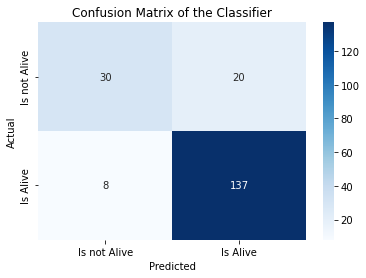

In [103]:
# calling the visual_cm function
visual_cm(true_y = y_test_full,
          pred_y = full_gbm_tuned_pred,
          labels = ['Is not Alive', 'Is Alive'])

In [104]:
# Instantiating the model object without hyperparameters
sig_gbm = GradientBoostingClassifier(loss          = 'exponential',
                                     learning_rate  = 1.6,
                                     n_estimators   = 125,
                                     criterion      = 'mse',
                                     max_depth      = 2,
                                     warm_start     = True,
                                     random_state   = 219)


# Fitting the training data
sig_gbm_tuned_fit = sig_gbm.fit(x_train_sig, y_train_sig)


# Predicting based on the testing set
sig_gbm_tuned_pred = sig_gbm_tuned_fit.predict(x_test_sig)


# SCORING the results
print('Full Training ACCURACY:', sig_gbm_tuned_fit.score(x_train_sig, y_train_sig).round(4))
print('Full Testing ACCURACY :', sig_gbm_tuned_fit.score(x_test_sig, y_test_sig).round(4))
print('AUC Score             :', roc_auc_score(y_true = y_test_sig, y_score = sig_gbm_tuned_pred).round(4))

# Saving for future use
sig_gbm_tuned_train_score =  sig_gbm_tuned_fit.score(x_train_sig, y_train_sig).round(4) # accuracy
sig_gbm_tuned_test_score =  sig_gbm_tuned_fit.score(x_test_sig, y_test_sig).round(4)   # accuracy
sig_gbm_tuned_auc_score =  roc_auc_score(y_true = y_test_sig, y_score = sig_gbm_tuned_pred).round(4) # auc

Full Training ACCURACY: 0.8001
Full Testing ACCURACY : 0.8462
AUC Score             : 0.7197


In [105]:
# Build a confusion matrix
# Unpacking the confusion matrix
sig_gbm_tuned_tn, \
sig_gbm_tuned_fp, \
sig_gbm_tuned_fn, \
sig_gbm_tuned_tp = confusion_matrix(y_true = y_test_sig, y_pred = sig_gbm_tuned_pred).ravel()


# Printing each result one-by-one
print(f"""
True Negatives : {sig_gbm_tuned_tn}
False Positives: {sig_gbm_tuned_fp}
False Negatives: {sig_gbm_tuned_fn}
True Positives : {sig_gbm_tuned_tp}
""")


True Negatives : 23
False Positives: 27
False Negatives: 3
True Positives : 142



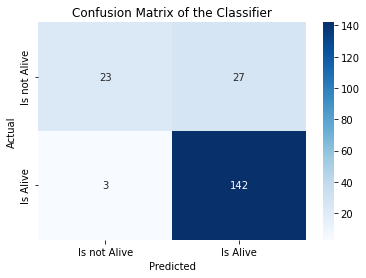

In [106]:
# Calling the visual_cm function
visual_cm(true_y = y_test_sig,
          pred_y = sig_gbm_tuned_pred,
          labels = ['Is not Alive', 'Is Alive'])

Summary Part<br>
I make a decision based on which model have both good AUC score and good accuracy 

In [108]:
#summary of model

print(f"""
My final model is Random forrest that use tune parameter which has detail follow this:
    Model                  Train Score    Test Score     AUC    Confusion Matrix      Accuracy
----------------          -----------    ----------    ------- -------------------   -----------
rand_forrest_tuned (Full)    {full_tuned_rf_train_score}\t  {full_tuned_rf_test_score}\t{full_tuned_rf_auc_score}\t{full_tuned_rf_tn,full_tuned_rf_fp,full_tuned_rf_fn,full_tuned_rf_tp}\t{((full_tuned_rf_tn+full_tuned_rf_tp)/(full_tuned_rf_tn+full_tuned_rf_fp+full_tuned_rf_fn+full_tuned_rf_tp)*100).round(decimals = 2)}

     Model                  Train Score    Test Score     AUC    Confusion Matrix      Accuracy
----------------          -----------    ----------    ------- -------------------   -----------
log_reg (Full)               {logreg_train_score_full}\t  {logreg_test_score_full}\t{logreg_auc_score}\t{logreg_full_tn,logreg_full_fp,logreg_full_fn,logreg_full_tp}\t{((logreg_full_tn+logreg_full_tp)/(logreg_full_tn+logreg_full_fp+logreg_full_fn+logreg_full_tp)*100).round(decimals = 2)}
log_reg (Sig)                {logreg_train_score_sig}\t  {logreg_test_score_sig}\t{logreg_auc_score_sig}\t{logreg_sig_tn,logreg_sig_fp,logreg_sig_fn,logreg_sig_tp}\t{((logreg_sig_tn+logreg_sig_tp)/(logreg_sig_tn+logreg_sig_fp+logreg_sig_fn+logreg_sig_tp)*100).round(decimals = 2)}
log_reg_tuned (Full)         {tuned_logreg_train_score_full}\t  {tuned_logreg_test_score_full}\t{tuned_logreg_auc_score_full}\t{tuned_logreg_full_tn,tuned_logreg_full_fp,tuned_logreg_full_fn,tuned_logreg_full_tp}\t{((tuned_logreg_full_tn+tuned_logreg_full_tp)/(tuned_logreg_full_tn+tuned_logreg_full_fp+tuned_logreg_full_fn+tuned_logreg_full_tp)*100).round(decimals = 2)}
log_reg_tuned (sig)          {tuned_logreg_train_score_sig}\t  {tuned_logreg_test_score_sig}\t{tuned_logreg_auc_score_sig}\t{tuned_logreg_sig_tn,tuned_logreg_sig_fp,tuned_logreg_sig_fn,tuned_logreg_sig_tp}\t{((tuned_logreg_sig_tn+tuned_logreg_sig_tp)/(tuned_logreg_sig_tn+tuned_logreg_sig_fp+tuned_logreg_sig_fn+tuned_logreg_sig_tp)*100).round(decimals = 2)}
KNN (Full)                   {full_knn_train_score}\t  {full_knn_test_score}\t{full_knn_auc_score}\t{full_tuned_knn_tn,full_tuned_knn_fp,full_tuned_knn_fn,full_tuned_knn_tp}\t{((full_tuned_knn_tn+full_tuned_knn_tp)/(full_tuned_knn_tn+full_tuned_knn_fp+full_tuned_knn_fn+full_tuned_knn_tp)*100).round(decimals = 2)}
KNN (Sig)                    {sig_knn_train_score}\t  {sig_knn_test_score}\t{sig_knn_auc_score}\t{sig_tuned_knn_tn,sig_tuned_knn_fp,sig_tuned_knn_fn,sig_tuned_knn_tp}\t{((sig_tuned_knn_tn+sig_tuned_knn_tp)/(sig_tuned_knn_tn+sig_tuned_knn_fp+sig_tuned_knn_fn+sig_tuned_knn_tp)*100).round(decimals = 2)}
class_tree (Full)            {full_tree_train_score}\t  {full_tree_test_score}\t{full_tree_auc_score}\t{full_tree_tn, full_tree_fp, full_tree_fn,full_tree_tp}\t{((full_tree_tn+full_tree_tp)/(full_tree_tn+full_tree_fp+full_tree_fn+full_tree_tp)*100).round(decimals = 2)}
class_tree (Sig)             {sig_tree_train_score}\t  {sig_tree_test_score}\t\t{sig_tree_auc_score}\t{sig_tree_tn, sig_tree_fp, sig_tree_fn, sig_tree_tp}\t{((sig_tree_tn+sig_tree_tp)/(sig_tree_tn+sig_tree_fp+sig_tree_fn+sig_tree_tp)*100).round(decimals = 2)}
class_tree_tuned (Full)      {full_tuned_tree_train_score}\t  {full_tuned_tree_test_score}\t{full_tuned_tree_auc_score}\t{full_tuned_tree_tn, full_tuned_tree_fp,full_tuned_tree_fn, full_tuned_tree_tp}\t{((full_tuned_tree_tn+full_tuned_tree_tp)/(full_tuned_tree_tn+full_tuned_tree_fp+full_tuned_tree_fn+full_tuned_tree_tp)*100).round(decimals = 2)}
class_tree_tuned (Sig)       {sig_tuned_tree_train_score}\t  {sig_tuned_tree_test_score}\t\t{sig_tuned_tree_auc_score}\t{sig_tuned_tree_tn, sig_tuned_tree_fp, sig_tuned_tree_fn, sig_tuned_tree_tp}\t{((sig_tuned_tree_tn+sig_tuned_tree_tp)/(sig_tuned_tree_tn+sig_tuned_tree_fp+sig_tuned_tree_fn+sig_tuned_tree_tp)*100).round(decimals = 2)}
rand_forrest (Full)          {full_rf_train_score}\t  {full_rf_test_score}\t\t{full_rf_auc_score}\t{full_rf_tn,full_rf_fp,full_rf_fn,full_rf_tp}\t{((full_rf_tn+full_rf_tp)/(full_rf_tn+full_rf_fp+full_rf_fn+full_rf_tp)*100).round(decimals = 2)}
rand_forrest (Sig)           {sig_rf_train_score}\t  {sig_rf_test_score}\t\t{sig_rf_auc_score}\t{sig_rf_tn,sig_rf_fp,sig_rf_fn,sig_rf_tp}\t{((sig_rf_tn+sig_rf_tp)/(sig_rf_tn+sig_rf_fp+sig_rf_fn+sig_rf_tp)*100).round(decimals = 2)}
rand_forrest_tuned (Full)    {full_tuned_rf_train_score}\t  {full_tuned_rf_test_score}\t{full_tuned_rf_auc_score}\t{full_tuned_rf_tn,full_tuned_rf_fp,full_tuned_rf_fn,full_tuned_rf_tp}\t{((full_tuned_rf_tn+full_tuned_rf_tp)/(full_tuned_rf_tn+full_tuned_rf_fp+full_tuned_rf_fn+full_tuned_rf_tp)*100).round(decimals = 2)}
rand_forrest_tuned (Sig)     {sig_tuned_rf_train_score}\t  {sig_tuned_rf_test_score}\t\t{sig_tuned_rf_auc_score}\t{sig_tuned_rf_tn,sig_tuned_rf_fp,sig_tuned_rf_fn,sig_tuned_rf_tp}\t{((sig_tuned_rf_tn+sig_tuned_rf_tp)/(sig_tuned_rf_tn+sig_tuned_rf_fp+sig_tuned_rf_fn+sig_tuned_rf_tp)*100).round(decimals = 2)}
grad_boost (Full)            {full_gbm_train_score}\t  {full_gbm_test_score}\t{full_gbm_auc_score}\t{full_gbm_tn,full_gbm_fp,full_gbm_fn,full_gbm_tp}\t{((full_gbm_tn+full_gbm_tp)/(full_gbm_tn+full_gbm_fp+full_gbm_fn+full_gbm_tp)*100).round(decimals = 2)}
grad_boost (Sig)             {sig_gbm_train_score}\t  {sig_gbm_test_score}\t{sig_gbm_auc_score}\t{sig_gbm_tn,sig_gbm_fp,sig_gbm_fn,sig_gbm_tp}\t{((sig_gbm_tn+sig_gbm_tp)/(sig_gbm_tn+sig_gbm_fp+sig_gbm_fn+sig_gbm_tp)*100).round(decimals = 2)}
grad_boost_tuned (Full)      {full_gbm_tuned_train_score}\t  {full_gbm_tuned_test_score}\t{full_gbm_tuned_auc_score}\t{full_gbm_tune_tn,full_gbm_tune_fp,full_gbm_tune_fn,full_gbm_tune_tp}\t{((full_gbm_tune_tn+full_gbm_tune_tp)/(full_gbm_tune_tn+full_gbm_tune_fp+full_gbm_tune_fn+full_gbm_tune_tp)*100).round(decimals = 2)}
grad_boost_tuned (sig)       {sig_gbm_tuned_train_score}\t  {sig_gbm_tuned_test_score}\t{sig_gbm_tuned_auc_score}\t{sig_gbm_tuned_tn,sig_gbm_tuned_fp,sig_gbm_tuned_fn,sig_gbm_tuned_tp}\t{((sig_gbm_tuned_tn+sig_gbm_tuned_tp)/(sig_gbm_tuned_tn+sig_gbm_tuned_fp+sig_gbm_tuned_fn+sig_gbm_tuned_tp)*100).round(decimals = 2)}
""")


My final model is Random forrest that use tune parameter which has detail follow this:
    Model                  Train Score    Test Score     AUC    Confusion Matrix      Accuracy
----------------          -----------    ----------    ------- -------------------   -----------
rand_forrest_tuned (Full)    0.8332	  0.8667	0.7466	(25, 25, 1, 144)	86.67

     Model                  Train Score    Test Score     AUC    Confusion Matrix      Accuracy
----------------          -----------    ----------    ------- -------------------   -----------
log_reg (Full)               0.7658	  0.8205	0.6631	(17, 33, 2, 143)	82.05
log_reg (Sig)                0.7853	  0.8462	0.7131	(22, 28, 2, 143)	84.62
log_reg_tuned (Full)         0.7818	  0.8513	0.7231	(23, 27, 2, 143)	85.13
log_reg_tuned (sig)          0.7853	  0.8564	0.7462	(26, 24, 4, 141)	85.64
KNN (Full)                   0.8218	  0.7744	0.6517	(20, 30, 14, 131)	77.44
KNN (Sig)                    0.7207	  0.7744	0.7238	(31, 19, 25, 120)	77.44